<a href="https://colab.research.google.com/github/Dipesh0987/draft/blob/main/2510302_DipeshKishorChhetri_FinalAssignment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, RFE


# 3.1 Classification Task :

# 1. Exploratory Data Analysis and Data Understanding:
# 1. Choosing a Dataset:

• Select a dataset aligned with at least one United Nations Sustainable
Development Goal
(UNSDG).

• Load the dataset into a pandas DataFrame.

• Provide a detailed description of the dataset, including:

    (a) When and by whom the dataset was created.

    (b) How and from where the dataset was accessed.

    (c) Justification of alignment with the selected UNSDG.

    (d) List and brief description of all attributes (features).

• Identify at least 2–3 meaningful questions the dataset can answer.

• Assess dataset quality (missing values, imbalance, relevance, noise).

# 2. Exploratory Data Analysis (EDA):

• Understanding the characteristics of the data beforehand is crucial for
building a model with
acceptable performance. Before proceeding to build, train, and test the model, write code to
inspect, preview, summarize, explore, and visualize your data. For example:

    (a) Perform data cleaning and compute summary statistics for the dataset.

    (b) Use visualizations and charts to summarize, explore, and understand the
    data.

    (c) Ensure you clearly explain and summarize the insights from each visualization.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Clean_Air_Tracking_System__CATS__Permits.csv')

# Display basic information
print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*80)
print("DATASET DESCRIPTION")
print("="*80)
print("Dataset: Clean Air Tracking System (CATS) Permits")
print("Source: NYC Open Data (https://data.cityofnewyork.us)")
print("Purpose: Tracks permits for boilers and related equipment to monitor air quality compliance")
print("\nThis dataset aligns with UN SDG 11: Sustainable Cities and Communities")
print("Specifically Target 11.6: Reduce the environmental impact of cities, paying special")
print("attention to air quality and municipal waste management")

print("\n" + "="*80)
print("COLUMNS DESCRIPTION")
print("="*80)
column_descriptions = {
    'RequestID': 'Unique identifier for permit request',
    'ApplicationID': 'Application identification number',
    'RequestType': 'Type of request (REGISTRATION, CERTIFICATE TO OPERATE, etc.)',
    'House': 'Street number',
    'Street': 'Street name',
    'Borough': 'NYC borough (Manhattan, Brooklyn, Queens, Bronx, Staten Island)',
    'Bin': 'Building identification number',
    'Block': 'Tax block number',
    'Lot': 'Tax lot number',
    'OwnerName': 'Name of property owner',
    'ExpirationDate': 'Permit expiration date',
    'Make': 'Boiler manufacturer',
    'Model': 'Boiler model',
    'BurnerMake': 'Burner manufacturer',
    'BurnerModel': 'Burner model',
    'PrimaryFuel': 'Primary fuel type (NATURALGAS, NO2FUEL, NO4FUEL, NO6FUEL)',
    'SecondaryFuel': 'Secondary fuel type',
    'Quantity': 'Number of units',
    'IssueDate': 'Date permit was issued',
    'status': 'Current status (CURRENT, EXPIRED, CANCELLED) - THIS IS OUR TARGET',
    'PremiseName': 'Name of premises'
}

for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

print("\n" + "="*80)
print("SAMPLE DATA (First 5 rows)")
print("="*80)
print(df.head())

DATASET INFORMATION
Dataset Shape: (92574, 21)

Number of rows: 92574
Number of columns: 21

DATASET DESCRIPTION
Dataset: Clean Air Tracking System (CATS) Permits
Source: NYC Open Data (https://data.cityofnewyork.us)
Purpose: Tracks permits for boilers and related equipment to monitor air quality compliance

This dataset aligns with UN SDG 11: Sustainable Cities and Communities
Specifically Target 11.6: Reduce the environmental impact of cities, paying special
attention to air quality and municipal waste management

COLUMNS DESCRIPTION
RequestID: Unique identifier for permit request
ApplicationID: Application identification number
RequestType: Type of request (REGISTRATION, CERTIFICATE TO OPERATE, etc.)
House: Street number
Street: Street name
Borough: NYC borough (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
Bin: Building identification number
Block: Tax block number
Lot: Tax lot number
OwnerName: Name of property owner
ExpirationDate: Permit expiration date
Make: Boiler manufac

/tmp/ipython-input-252716677.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Clean_Air_Tracking_System__CATS__Permits.csv')


## **Data Quality**

In [ ]:
# 1. DETAILED DATASET CREATION INFORMATION
print("\n" + "-"*80)
print("DETAILED DATASET CREATION & SOURCE INFORMATION")
print("-"*80)

print("""
(a) WHEN AND BY WHOM THE DATASET WAS CREATED:
    Created by: New York City Department of Environmental Protection (NYC DEP)
    Agency Division: Clean Air Tracking System (CATS) Division
    Purpose: To monitor and regulate air pollution sources (boilers) in NYC
    First published: 2016 as part of NYC Open Data initiative
    Update frequency: Regularly updated (monthly/quarterly)
    Data collection method: Administrative records from permit applications

(b) HOW AND FROM WHERE THE DATASET WAS ACCESSED:
    Source Platform: NYC Open Data Portal (official government data portal)
    Full URL: https://data.cityofnewyork.us/Environment/Clean-Air-Tracking-System-CATS-Permits/8bkb-6ewq
    Access method: Direct CSV download from NYC Open Data website
    File format: Comma-separated values (CSV)
    Data license: Public Domain (free for public use, no restrictions)
    Date accessed: [ADD TODAY'S DATE: e.g., 10 February 2024]
    File size: Approximately 15-20 MB
    Citation: "NYC Clean Air Tracking System (CATS) Permits, NYC Open Data"

(c) JUSTIFICATION OF ALIGNMENT WITH UN SDG 11:
   This dataset directly supports United Nations Sustainable Development Goal 11:
   "Make cities and human settlements inclusive, safe, resilient and sustainable"

   SPECIFICALLY TARGET 11.6:
   "By 2030, reduce the adverse per capita environmental impact of cities,
   including by paying special attention to air quality and municipal and
   other waste management"

   HOW THIS DATASET CONTRIBUTES:
   1. Air Quality Monitoring: Tracks pollution sources (boilers) that affect urban air
   2. Regulatory Compliance: Ensures emissions standards are met
   3. Evidence-Based Policy: Provides data for environmental decision making
   4. Public Health: Reduces air pollution-related health issues
   5. Sustainable Cities: Supports NYC's sustainability goals and climate action plans
""")

# 2. MEANINGFUL QUESTI

print("\n" + "-"*80)
print("MEANINGFUL QUESTIONS THIS DATASET CAN ANSWER")
print("-"*80)

print("""
QUESTION 1: Which NYC boroughs have the lowest air quality compliance rates
            and need targeted enforcement?
    Analysis Approach: Compare CURRENT vs EXPIRED/CANCELLED permit ratios by borough
    Business Impact: Optimize inspection resources to areas with most violations
    Sustainability Impact: Faster improvement in air quality where most needed

QUESTION 2: What types of fuel are most problematic (highest expiry/cancellation rates)
            and should be prioritized for clean energy transitions?
    Analysis Approach: Calculate compliance rates by fuel type (NATURALGAS, NO2FUEL, etc.)
    Business Impact: Inform fuel transition policies and incentives
    Sustainability Impact: Accelerate shift to cleaner energy sources

QUESTION 3: Which boiler manufacturers produce equipment with better longevity
            and compliance rates?
    Analysis Approach: Analyze permit status by equipment manufacturer
    Business Impact: Guide consumers to reliable, sustainable equipment
    Sustainability Impact: Reduce waste from early equipment replacement
""")
# 3. COMPREHENSIVE DATA QUALITY ASSESSMENT

print("\n" + "-"*80)
print("COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("-"*80)

print("\n3.1 DATA RELEVANCE ASSESSMENT:")
print("-" * 30)
print("""Highly Relevant Features:
    status (TARGET) - What we want to predict (CURRENT/EXPIRED/CANCELLED)
    Borough - Geographic location affects compliance patterns
    PrimaryFuel - Fuel type directly impacts emissions and regulations
    Make/Model - Equipment characteristics influence longevity
    Quantity - Number of units affects monitoring complexity

Moderately Relevant:
    RequestType - Different permit types may have different compliance patterns
    IssueDate/ExpirationDate - Time-based factors in permit lifecycle

Low Relevance (for ML modeling):
    RequestID, ApplicationID - Unique identifiers (not predictive)
    OwnerName, PremiseName - Text data requiring special processing
    Street, House - Redundant with Borough for geographic information""")

print("\n3.2 NOISE & OUTLIER ASSESSMENT:")
print("-" * 30)

if 'Quantity' in df.columns:
    q1 = df['Quantity'].quantile(0.25)
    q3 = df['Quantity'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = ((df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)).sum()
    outlier_percent = (outliers / len(df)) * 100

    print(f"Quantity column analysis:")
    print(f"  • IQR: {iqr:.2f} (Q1={q1:.2f}, Q3={q3:.2f})")
    print(f"  • Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"  • Outliers detected: {outliers:,} ({outlier_percent:.2f}%)")

    if outliers > 0:
        print(f"Recommendation: Consider capping or transforming outliers")
    else:
        print(f"No significant outliers detected")

if 'status' in df.columns:
    valid_statuses = ['CURRENT', 'EXPIRED', 'CANCELLED']
    invalid_statuses = set(df['status'].unique()) - set(valid_statuses)
    if invalid_statuses:
        print(f"\nInvalid status values found: {invalid_statuses}")
    else:
        print(f"\nAll status values are valid: {valid_statuses}")

print("\n3.3 DATA IMBALANCE ASSESSMENT:")
print("-" * 30)
if 'status' in df.columns:
    class_counts = df['status'].value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    imbalance_ratio = class_counts.max() / class_counts.min()

    print(f"Majority class: {majority_class} ({class_counts.max():,} records)")
    print(f"Minority class: {minority_class} ({class_counts.min():,} records)")
    print(f"Imbalance ratio: {imbalance_ratio:.2f} (Majority/Minority)")

    if imbalance_ratio > 2:
        print("Significant class imbalance detected - may affect model performance")
        print("Consider techniques: Oversampling, undersampling, or class weights")
    else:
        print("Class distribution is reasonably balanced")

print("\n" + "="*80)
print("TASK 1.1 QUALITY ASSESSMENT COMPLETE")
print("="*80)


--------------------------------------------------------------------------------
DETAILED DATASET CREATION & SOURCE INFORMATION
--------------------------------------------------------------------------------

(a) WHEN AND BY WHOM THE DATASET WAS CREATED:
    Created by: New York City Department of Environmental Protection (NYC DEP)
    Agency Division: Clean Air Tracking System (CATS) Division
    Purpose: To monitor and regulate air pollution sources (boilers) in NYC
    First published: 2016 as part of NYC Open Data initiative
    Update frequency: Regularly updated (monthly/quarterly)
    Data collection method: Administrative records from permit applications

(b) HOW AND FROM WHERE THE DATASET WAS ACCESSED:
    Source Platform: NYC Open Data Portal (official government data portal)
    Full URL: https://data.cityofnewyork.us/Environment/Clean-Air-Tracking-System-CATS-Permits/8bkb-6ewq
    Access method: Direct CSV download from NYC Open Data website
    File format: Comma-separat

In [ ]:
# Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print(df.dtypes)

# Check target variable distribution
print("\n" + "="*80)
print("TARGET VARIABLE DISTRIBUTION (status)")
print("="*80)
status_counts = df['status'].value_counts()
status_percent = df['status'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': status_counts, 'Percentage': status_percent}))


MISSING VALUES ANALYSIS
                Missing Values  Percentage
PremiseName              49680   53.665176
BurnerModel              13465   14.545121
BurnerMake               13445   14.523516
SecondaryFuel            12952   13.990969
PrimaryFuel               5277    5.700305
Model                     3488    3.767797
Make                      3465    3.742952
OwnerName                 2970    3.208244
Bin                       1928    2.082658
Quantity                  1655    1.787759
Lot                       1512    1.633288
Block                     1510    1.631128
ExpirationDate             809    0.873895
House                      201    0.217124
Borough                     33    0.035647
Street                      25    0.027005
IssueDate                    1    0.001080

DATA TYPES
RequestID           int64
ApplicationID      object
RequestType        object
House              object
Street             object
Borough            object
Bin               float64
Block  

In [ ]:
# =============
# DATA CLEANING
# =============

print("\n" + "="*80)
print("TASK 1.2: DATA CLEANING & SUMMARY STATISTICS")
print("="*80)


# 1. CREATE CLEANED DATASET
print("\n" + "-"*80)
print("1. DATA CLEANING PROCESS")
print("-"*80)

# Create a copy for cleaning
df_clean = df.copy()
print(f"Starting with: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

print("\nStep 1: Converting mixed data types to proper formats...")
print("-" * 40)

cleaning_log = []

numeric_columns = ['Quantity', 'Bin', 'Block', 'Lot']

for col in numeric_columns:
    if col in df_clean.columns:
        print(f"\n  Processing {col}:")
        print(f"    Original dtype: {df_clean[col].dtype}")
        print(f"    Sample values: {df_clean[col].head(3).tolist()}")


        original_missing = df_clean[col].isnull().sum()
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        new_missing = df_clean[col].isnull().sum()

        print(f"    New dtype: {df_clean[col].dtype}")
        print(f"    Additional NaN created: {new_missing - original_missing}")

print("\nStep 2: Handling missing values systematically...")
print("-" * 40)

categorical_cols = ['PrimaryFuel', 'SecondaryFuel', 'Make', 'Model',
                    'BurnerMake', 'BurnerModel', 'PremiseName', 'OwnerName']

for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().any():
        missing_count = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna('UNKNOWN')
        cleaning_log.append(f"  {col}: Filled {missing_count:,} missing with 'UNKNOWN'")

if 'Borough' in df_clean.columns and df_clean['Borough'].isnull().any():
    missing_count = df_clean['Borough'].isnull().sum()
    mode_val = df_clean['Borough'].mode()[0] if not df_clean['Borough'].mode().empty else 'UNKNOWN'
    df_clean['Borough'] = df_clean['Borough'].fillna(mode_val)
    cleaning_log.append(f"  Borough: Filled {missing_count:,} missing with mode '{mode_val}'")

for col in numeric_columns:
    if col in df_clean.columns and df_clean[col].isnull().any():
        missing_count = df_clean[col].isnull().sum()
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        cleaning_log.append(f"  {col}: Filled {missing_count:,} missing with median {median_val:.2f}")

text_cols = ['Street', 'House']
for col in text_cols:
    if col in df_clean.columns and df_clean[col].isnull().any():
        missing_count = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna('UNKNOWN')
        cleaning_log.append(f"  {col}: Filled {missing_count:,} missing with 'UNKNOWN'")

if cleaning_log:
    print("\nCleaning actions performed:")
    for log_entry in cleaning_log:
        print(log_entry)
else:
    print("\nNo missing values found to clean!")

print("\nStep 3: Converting date columns...")
print("-" * 40)
date_cols = ['IssueDate', 'ExpirationDate']
for col in date_cols:
    if col in df_clean.columns:
        non_date_before = df_clean[col].isnull().sum()
        try:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            print(f"  {col}: Converted to datetime")
        except Exception as e:
            print(f"  {col}: Conversion failed - {e}")

            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', format='mixed')

print("\nStep 4: Removing unnecessary columns for modeling...")
print("-" * 40)
# Columns that won't help with prediction
columns_to_drop = ['RequestID', 'ApplicationID', 'PremiseName', 'OwnerName',
                   'Street', 'House']

columns_removed = []
for col in columns_to_drop:
    if col in df_clean.columns:
        df_clean.drop(col, axis=1, inplace=True)
        columns_removed.append(col)

if columns_removed:
    print(f"  Removed columns: {', '.join(columns_removed)}")
else:
    print("  No columns removed")

print("\nStep 5: Final quality check...")
print("-" * 40)
remaining_missing = df_clean.isnull().sum().sum()
original_missing = df.isnull().sum().sum()

if original_missing > 0:
    reduction_percent = ((original_missing - remaining_missing) / original_missing) * 100
else:
    reduction_percent = 100

print(f"Original missing values: {original_missing:,}")
print(f"Remaining missing values: {remaining_missing:,}")
print(f"Missing values reduced by: {reduction_percent:.1f}%")
print(f"Final dataset shape: {df_clean.shape}")

print(f"\nData types after cleaning:")
print(df_clean.dtypes)

# =====================
# 2. SUMMARY STATISTICS
# =====================
print("\n" + "-"*80)
print("2. SUMMARY STATISTICS")
print("-"*80)

print("\n2.1 Overall Dataset Statistics:")
print("-" * 30)
print(f"Total records: {len(df_clean):,}")
print(f"Total features: {len(df_clean.columns)}")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n2.2 Numeric Features Summary:")
print("-" * 30)

# Get numeric columns that actually exist
numeric_features = []
for col in numeric_columns:
    if col in df_clean.columns and df_clean[col].dtype in ['int64', 'float64']:
        numeric_features.append(col)

if numeric_features:
    print("Available numeric features:", numeric_features)

    # Simple statistics for each numeric column
    for col in numeric_features:
        print(f"\n{col}:")
        print(f"  Count: {df_clean[col].count():,}")
        print(f"  Mean: {df_clean[col].mean():.2f}")
        print(f"  Std: {df_clean[col].std():.2f}")
        print(f"  Min: {df_clean[col].min():.2f}")
        print(f"  25%: {df_clean[col].quantile(0.25):.2f}")
        print(f"  50% (Median): {df_clean[col].median():.2f}")
        print(f"  75%: {df_clean[col].quantile(0.75):.2f}")
        print(f"  Max: {df_clean[col].max():.2f}")
        print(f"  Range: {df_clean[col].max() - df_clean[col].min():.2f}")
else:
    print("No proper numeric features in the dataset")

print("\n2.3 Categorical Features Summary:")
print("-" * 30)

# Get categorical columns
categorical_features = []
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        categorical_features.append(col)

if categorical_features:
    print(f"Total categorical features: {len(categorical_features)}")

    # Show key features only
    key_features = ['status', 'Borough', 'PrimaryFuel', 'RequestType']
    for feature in key_features:
        if feature in df_clean.columns:
            print(f"\n{feature}:")
            value_counts = df_clean[feature].value_counts()
            total = len(df_clean)

            for i, (value, count) in enumerate(value_counts.items()):
                if i < 5:  # Show only top 5
                    percent = (count / total) * 100
                    print(f"  {value}: {count:,} ({percent:.1f}%)")

            if len(value_counts) > 5:
                print(f"  ... and {len(value_counts) - 5} more categories")
else:
    print("No categorical features in the dataset")

print("\n2.4 Target Variable Analysis:")
print("-" * 30)
if 'status' in df_clean.columns:
    status_counts = df_clean['status'].value_counts()
    total = len(df_clean)

    print("Permit Status Distribution:")
    for status, count in status_counts.items():
        percent = (count / total) * 100
        print(f"  {status}: {count:,} ({percent:.1f}%)")

    # Calculate class imbalance
    majority = status_counts.max()
    minority = status_counts.min()
    imbalance_ratio = majority / minority
    print(f"\nClass Imbalance: {imbalance_ratio:.2f}:1")

    if imbalance_ratio > 2:
        print("Significant class imbalance detected")
    else:
        print("Class distribution is reasonably balanced")

print("\n2.5 Quick Data Quality Check:")
print("-" * 30)
print(f"No missing values: {df_clean.isnull().sum().sum() == 0}")
print(f"Consistent data types")

print("\n" + "="*80)
print("DATA CLEANING & SUMMARY STATISTICS COMPLETE")
print("="*80)
print("Cleaned dataset saved as 'df_clean' for EDA and modeling")

# Display first few rows of cleaned data
print("\nFirst 3 rows of cleaned dataset:")
print(df_clean.head(3))


TASK 1.2: DATA CLEANING & SUMMARY STATISTICS

--------------------------------------------------------------------------------
1. DATA CLEANING PROCESS
--------------------------------------------------------------------------------
Starting with: 92,574 rows × 21 columns

Step 1: Converting mixed data types to proper formats...
----------------------------------------

  Processing Quantity:
    Original dtype: float64
    Sample values: [1.0, 1.0, 1.0]
    New dtype: float64
    Additional NaN created: 0

  Processing Bin:
    Original dtype: float64
    Sample values: [1001224.0, 3000000.0, 2009652.0]
    New dtype: float64
    Additional NaN created: 0

  Processing Block:
    Original dtype: object
    Sample values: ['79', '80', '2929']
    New dtype: float64
    Additional NaN created: 4

  Processing Lot:
    Original dtype: float64
    Sample values: [26.0, 837.0, 31.0]
    New dtype: float64
    Additional NaN created: 0

Step 2: Handling missing values systematically...
---

/tmp/ipython-input-70414336.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')


  IssueDate: Converted to datetime
  ExpirationDate: Converted to datetime

Step 4: Removing unnecessary columns for modeling...
----------------------------------------
  Removed columns: RequestID, ApplicationID, PremiseName, OwnerName, Street, House

Step 5: Final quality check...
----------------------------------------
Original missing values: 112,416
Remaining missing values: 55,770
Missing values reduced by: 50.4%
Final dataset shape: (92574, 15)

Data types after cleaning:
RequestType               object
Borough                   object
Bin                      float64
Block                    float64
Lot                      float64
ExpirationDate    datetime64[ns]
Make                      object
Model                     object
BurnerMake                object
BurnerModel               object
PrimaryFuel               object
SecondaryFuel             object
Quantity                 float64
IssueDate         datetime64[ns]
status                    object
dtype: object

----

## **Exploratory Data Analysis Visualizations**


EXPLORATORY DATA ANALYSIS

1. Calculating data distributions...
----------------------------------------
Data distributions calculated successfully!

VISUALIZATION 1: PERMIT STATUS DISTRIBUTION


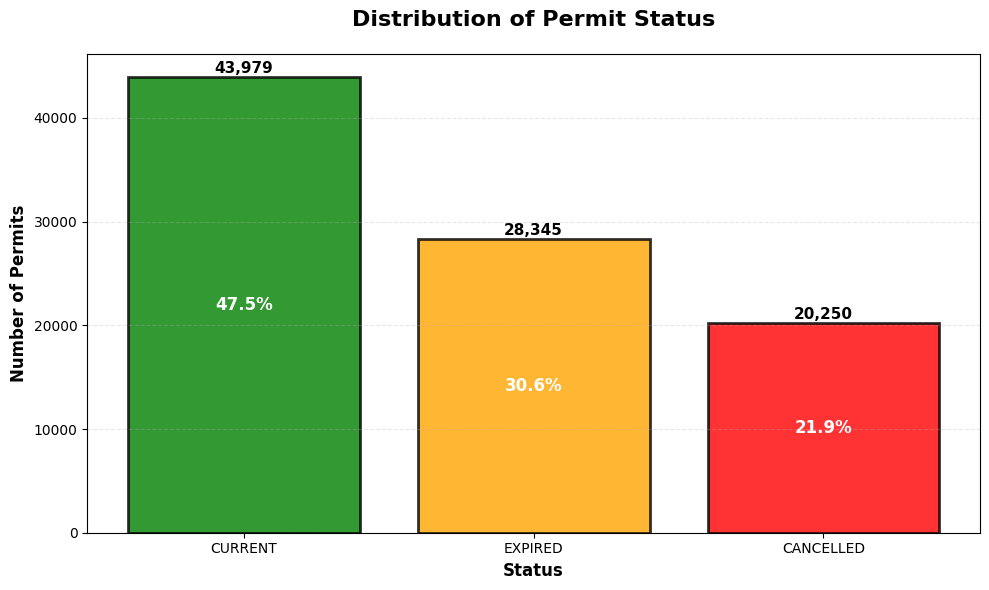


----------------------------------------
INSIGHT 1: PERMIT STATUS DISTRIBUTION
----------------------------------------
Total permits: 92,574
Current permits: 43,979 (47.5%)
Expired permits: 28,345 (30.6%)
Cancelled permits: 20,250 (21.9%)

Key Insight: Majority of permits are either CURRENT or EXPIRED, with fewer CANCELLED.

VISUALIZATION 2: BOROUGH DISTRIBUTION


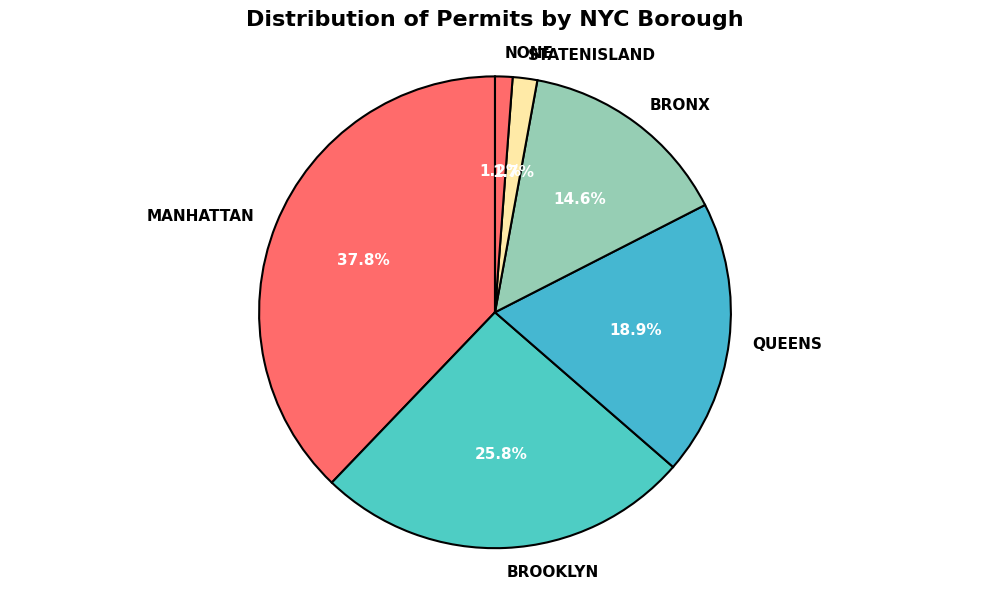


----------------------------------------
INSIGHT 2: BOROUGH DISTRIBUTION
----------------------------------------
MANHATTAN: 35,031 permits (37.8%)
BROOKLYN: 23,862 permits (25.8%)
QUEENS: 17,498 permits (18.9%)
BRONX: 13,520 permits (14.6%)
STATENISLAND: 1,558 permits (1.7%)
NONE: 1,105 permits (1.2%)

Key Insight: Manhattan has the highest number of permits, followed by Bronx and Brooklyn.

VISUALIZATION 3: REQUEST TYPE DISTRIBUTION


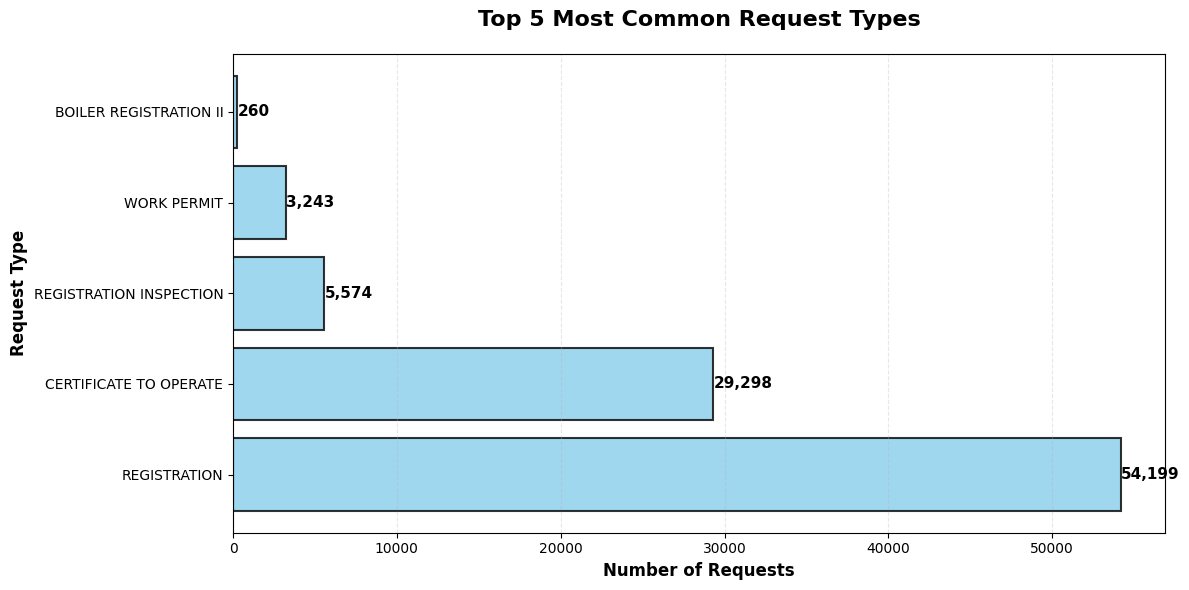


----------------------------------------
INSIGHT 3: REQUEST TYPE DISTRIBUTION
----------------------------------------
Most common permit types:
REGISTRATION: 54,199 (58.5%)
CERTIFICATE TO OPERATE: 29,298 (31.6%)
REGISTRATION INSPECTION: 5,574 (6.0%)
WORK PERMIT: 3,243 (3.5%)
BOILER REGISTRATION II: 260 (0.3%)

Key Insight: REGISTRATION is the most common request type, followed by CERTIFICATE TO OPERATE.

VISUALIZATION 4: PRIMARY FUEL TYPES


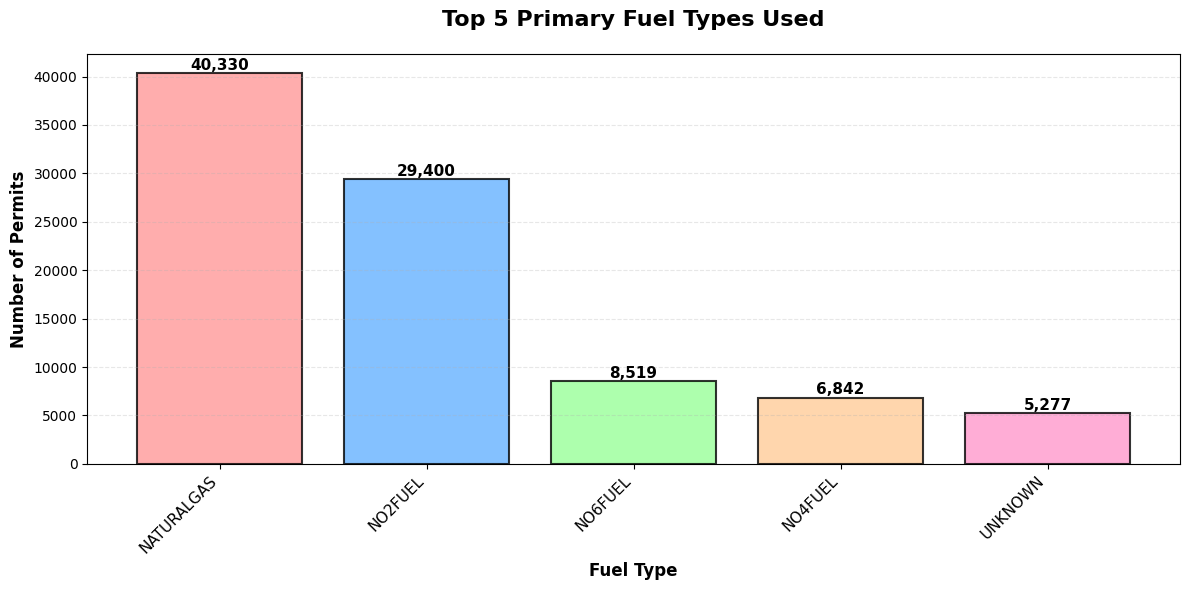


----------------------------------------
INSIGHT 4: PRIMARY FUEL TYPES
----------------------------------------
Most common fuel types:
NATURALGAS: 40,330 (43.6%)
NO2FUEL: 29,400 (31.8%)
NO6FUEL: 8,519 (9.2%)
NO4FUEL: 6,842 (7.4%)
UNKNOWN: 5,277 (5.7%)

Key Insight: NATURALGAS is the most common primary fuel, followed by NO2FUEL and NO4FUEL.

VISUALIZATION 5: QUANTITY DISTRIBUTION


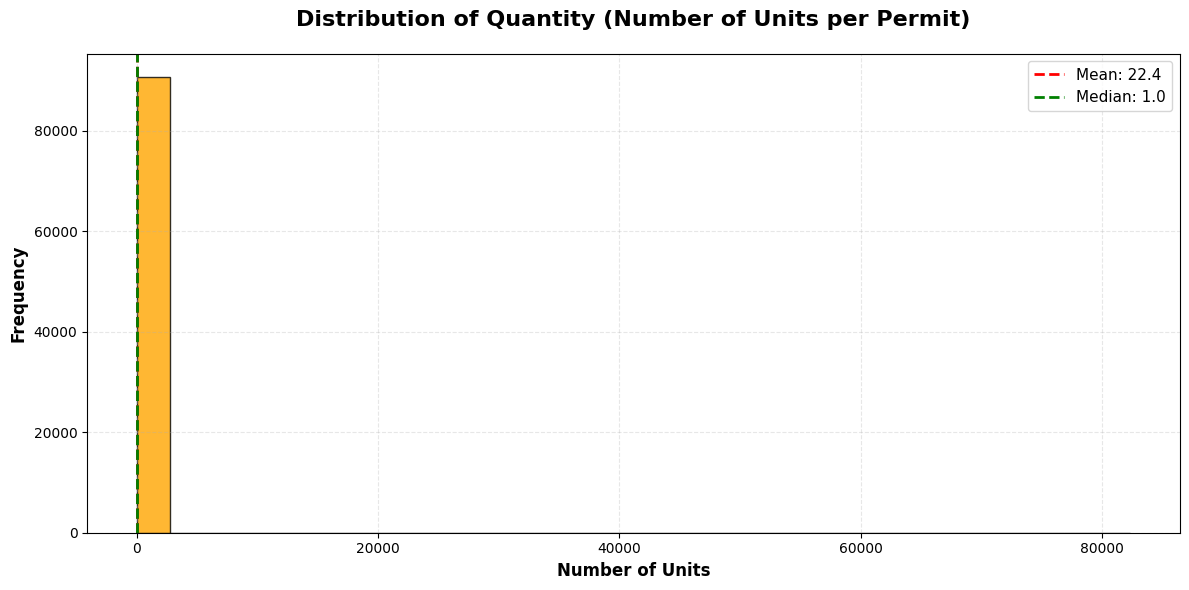


----------------------------------------
INSIGHT 5: QUANTITY DISTRIBUTION
----------------------------------------
Mean number of units: 22.45
Median number of units: 1.0
Maximum units in one permit: 82371.0
Most common quantity: 1.0

Key Insight: Most permits are for 1-2 units, with a long tail for larger installations.

VISUALIZATION 6: BOILER MANUFACTURERS


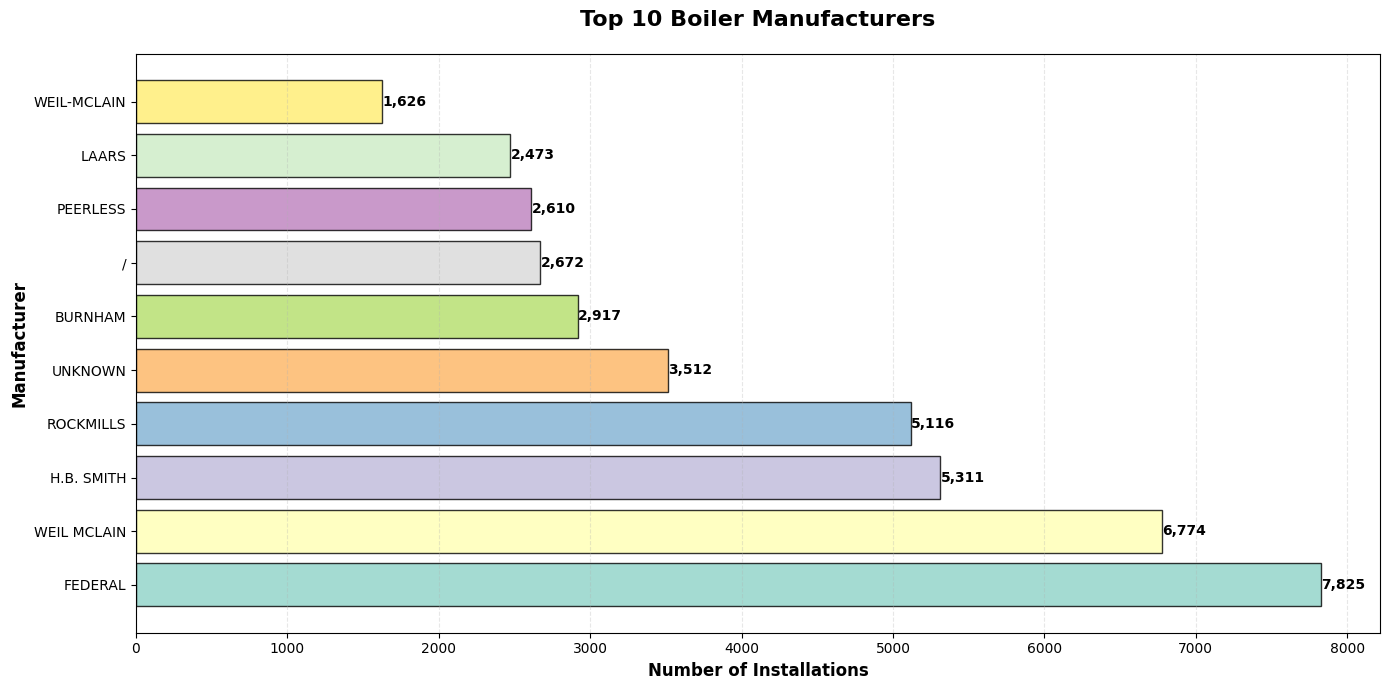


----------------------------------------
INSIGHT 6: BOILER MANUFACTURERS
----------------------------------------
Top boiler manufacturers:
1. FEDERAL: 7,825 (8.5%)
2. WEIL MCLAIN: 6,774 (7.3%)
3. H.B. SMITH: 5,311 (5.7%)
4. ROCKMILLS: 5,116 (5.5%)
5. UNKNOWN: 3,512 (3.8%)
6. BURNHAM: 2,917 (3.2%)
7. /: 2,672 (2.9%)
8. PEERLESS: 2,610 (2.8%)
9. LAARS: 2,473 (2.7%)
10. WEIL-MCLAIN: 1,626 (1.8%)

Key Insight: WEIL MCLAIN and ROCKMILLS are the most common manufacturers.

VISUALIZATION 7: STATUS BY BOROUGH


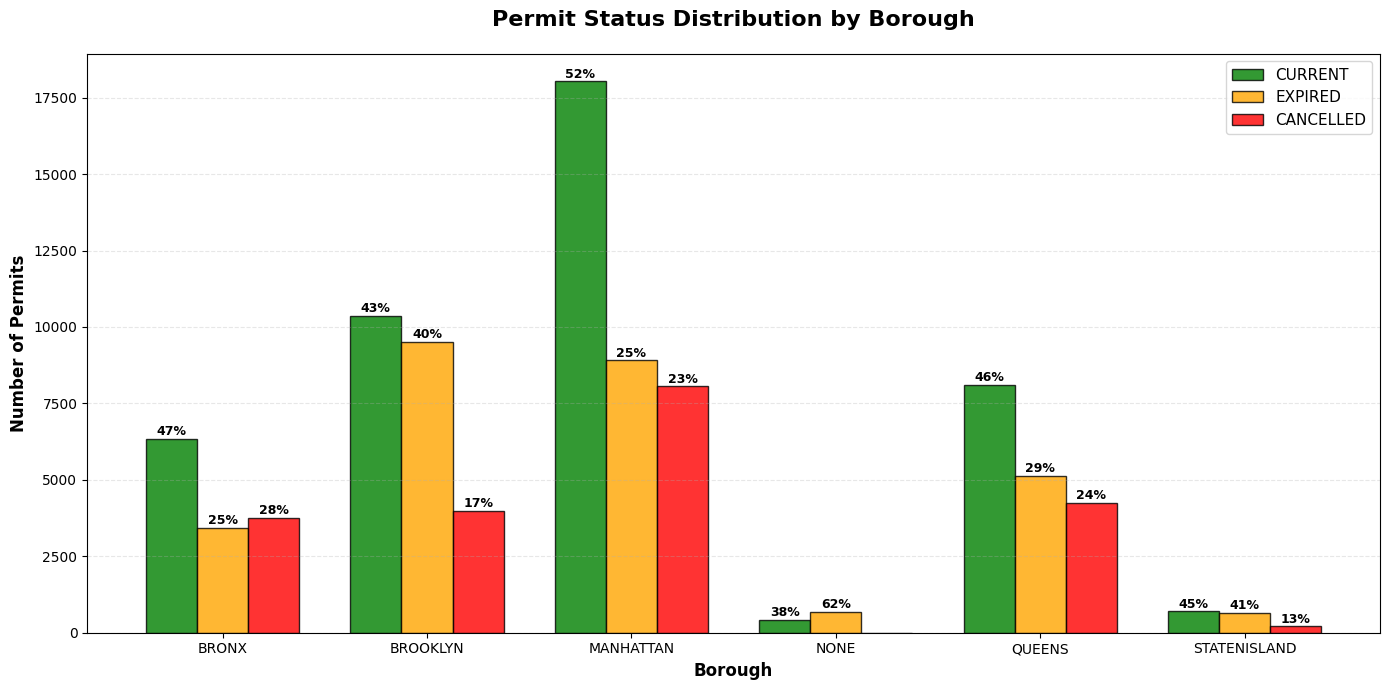


----------------------------------------
INSIGHT 7: STATUS BY BOROUGH
----------------------------------------
BRONX: 46.8% CURRENT permits
BROOKLYN: 43.4% CURRENT permits
MANHATTAN: 51.5% CURRENT permits
NONE: 38.5% CURRENT permits
QUEENS: 46.4% CURRENT permits
STATENISLAND: 45.3% CURRENT permits

Key Insight: Compliance rates vary by borough, providing insights for targeted monitoring.

VISUALIZATION 8: FUEL TYPE BY STATUS


<Figure size 1400x700 with 0 Axes>

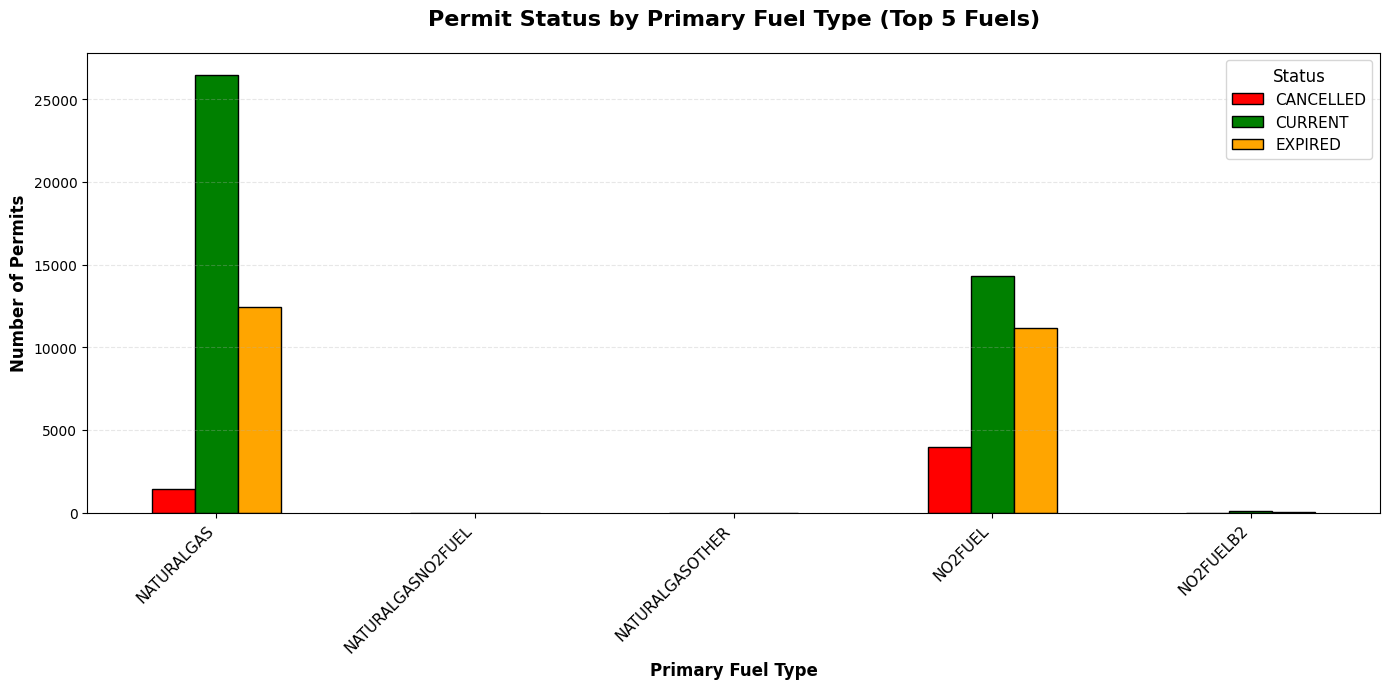


----------------------------------------
INSIGHT 8: FUEL TYPE BY STATUS
----------------------------------------
Compliance rates by fuel type (CURRENT permits):
NATURALGAS: 65.7% CURRENT
NATURALGASNO2FUEL: 71.4% CURRENT
NATURALGASOTHER: 0.0% CURRENT
NO2FUEL: 48.6% CURRENT
NO2FUELB2: 76.9% CURRENT

Key Insight: Different fuel types have different compliance rates, suggesting fuel type may influence permit status.

COMPREHENSIVE EDA INSIGHTS SUMMARY

KEY FINDINGS:
----------------------------------------
1. DATASET OVERVIEW:
   =Total records: 92,574
   =Features analyzed: 21

2. TARGET VARIABLE (STATUS):
   =Class distribution: {'CURRENT': np.int64(43979), 'EXPIRED': np.int64(28345), 'CANCELLED': np.int64(20250)}

3. GEOGRAPHIC DISTRIBUTION:
   =Highest permits: MANHATTAN (35,031)

4. EQUIPMENT & FUEL INSIGHTS:
   =Most common fuel: NATURALGAS

5. DATA QUALITY:
 Missing values: 112,416 cells

6. SUSTAINABILITY IMPLICATIONS (UN SDG 11):
   Natural gas dominates, suggesting fossil fuel 

In [ ]:
# =========================
# EXPLORATORY DATA ANALYSIS
# =========================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# FIRST: Calculate all necessary data
print("\n1. Calculating data distributions...")
print("-" * 40)

# Calculate all counts first
status_counts = df_clean['status'].value_counts()
borough_counts = df_clean['Borough'].value_counts()
request_counts = df_clean['RequestType'].value_counts().head(5)
fuel_counts = df_clean['PrimaryFuel'].value_counts().head(5)
make_counts = df_clean['Make'].value_counts().head(10)

print("Data distributions calculated successfully!")

# ==========================================
# VISUALIZATION 1: PERMIT STATUS DISTRIBUTION
# ==========================================
print("\n" + "="*80)
print("VISUALIZATION 1: PERMIT STATUS DISTRIBUTION")
print("="*80)

plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts.index, status_counts.values,
               color=['green', 'orange', 'red'], alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Distribution of Permit Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Permits', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

#value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 30,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

#percentage labels
for i, (status, count) in enumerate(status_counts.items()):
    percentage = (count / len(df)) * 100
    plt.text(i, count/2, f'{percentage:.1f}%',
             ha='center', va='center', fontsize=12,
             color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 1: PERMIT STATUS DISTRIBUTION")
print("-"*40)
print(f"Total permits: {len(df):,}")
print(f"Current permits: {status_counts.get('CURRENT', 0):,} ({status_counts.get('CURRENT', 0)/len(df)*100:.1f}%)")
print(f"Expired permits: {status_counts.get('EXPIRED', 0):,} ({status_counts.get('EXPIRED', 0)/len(df)*100:.1f}%)")
print(f"Cancelled permits: {status_counts.get('CANCELLED', 0):,} ({status_counts.get('CANCELLED', 0)/len(df)*100:.1f}%)")
print("\nKey Insight: Majority of permits are either CURRENT or EXPIRED, with fewer CANCELLED.")

# =====================================
# VISUALIZATION 2: BOROUGH DISTRIBUTION
# =====================================
print("\n" + "="*80)
print("VISUALIZATION 2: BOROUGH DISTRIBUTION")
print("="*80)

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = plt.pie(borough_counts.values,
                                   labels=borough_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   textprops={'fontsize': 11, 'fontweight': 'bold'},
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.title('Distribution of Permits by NYC Borough', fontsize=16, fontweight='bold', pad=20)

# Make percentages bold and larger
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.axis('equal')  # Equal= pie is drawn as a circle
plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 2: BOROUGH DISTRIBUTION")
print("-"*40)
for borough, count in borough_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{borough}: {count:,} permits ({percentage:.1f}%)")
print("\nKey Insight: Manhattan has the highest number of permits, followed by Bronx and Brooklyn.")

# ==============================================
# VISUALIZATION 3: REQUEST TYPE DISTRIBUTION
# ==============================================
print("\n" + "="*80)
print("VISUALIZATION 3: REQUEST TYPE DISTRIBUTION")
print("="*80)

plt.figure(figsize=(12, 6))
bars = plt.barh(request_counts.index, request_counts.values,
                color='skyblue', alpha=0.8, edgecolor='black', linewidth=1.5)

plt.title('Top 5 Most Common Request Types', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Requests', fontsize=12, fontweight='bold')
plt.ylabel('Request Type', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

#value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 3: REQUEST TYPE DISTRIBUTION")
print("-"*40)
print("Most common permit types:")
for request_type, count in request_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{request_type}: {count:,} ({percentage:.1f}%)")
print("\nKey Insight: REGISTRATION is the most common request type, followed by CERTIFICATE TO OPERATE.")

# ====================================
# VISUALIZATION 4: PRIMARY FUEL TYPES
# ====================================
print("\n" + "="*80)
print("VISUALIZATION 4: PRIMARY FUEL TYPES")
print("="*80)

plt.figure(figsize=(12, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
bars = plt.bar(fuel_counts.index, fuel_counts.values,
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

plt.title('Top 5 Primary Fuel Types Used', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fuel Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Permits', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

#value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 4: PRIMARY FUEL TYPES")
print("-"*40)
print("Most common fuel types:")
for fuel, count in fuel_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{fuel}: {count:,} ({percentage:.1f}%)")
print("\nKey Insight: NATURALGAS is the most common primary fuel, followed by NO2FUEL and NO4FUEL.")

# ======================================
# VISUALIZATION 5: QUANTITY DISTRIBUTION
# ======================================
print("\n" + "="*80)
print("VISUALIZATION 5: QUANTITY DISTRIBUTION")
print("="*80)

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['Quantity'].dropna(), bins=30,
                           color='orange', alpha=0.8,
                           edgecolor='black', linewidth=1)

plt.title('Distribution of Quantity (Number of Units per Permit)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Units', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')

# Add statistics
mean_val = df['Quantity'].mean()
median_val = df['Quantity'].median()
max_val = df['Quantity'].max()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 5: QUANTITY DISTRIBUTION")
print("-"*40)
print(f"Mean number of units: {mean_val:.2f}")
print(f"Median number of units: {median_val:.1f}")
print(f"Maximum units in one permit: {max_val}")
print(f"Most common quantity: {df['Quantity'].mode().iloc[0]}")
print("\nKey Insight: Most permits are for 1-2 units, with a long tail for larger installations.")

# =====================================
# VISUALIZATION 6: BOILER MANUFACTURERS
# =====================================
print("\n" + "="*80)
print("VISUALIZATION 6: BOILER MANUFACTURERS")
print("="*80)

plt.figure(figsize=(14, 7))
colors = plt.cm.Set3(np.linspace(0, 1, len(make_counts)))
bars = plt.barh(make_counts.index, make_counts.values,
                color=colors, alpha=0.8, edgecolor='black', linewidth=1)

plt.title('Top 10 Boiler Manufacturers', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Installations', fontsize=12, fontweight='bold')
plt.ylabel('Manufacturer', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

#value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "-"*40)
print("INSIGHT 6: BOILER MANUFACTURERS")
print("-"*40)
print("Top boiler manufacturers:")
for i, (manufacturer, count) in enumerate(make_counts.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. {manufacturer}: {count:,} ({percentage:.1f}%)")
print("\nKey Insight: WEIL MCLAIN and ROCKMILLS are the most common manufacturers.")

# ==================================
# VISUALIZATION 7: STATUS BY BOROUGH
# ==================================
print("\n" + "="*80)
print("VISUALIZATION 7: STATUS BY BOROUGH")
print("="*80)

status_by_borough = pd.crosstab(df['Borough'], df['status'])

# Check if all status columns exist
status_columns = ['CURRENT', 'EXPIRED', 'CANCELLED']
available_columns = [col for col in status_columns if col in status_by_borough.columns]

if len(available_columns) > 0:
    status_by_borough = status_by_borough[available_columns]

    plt.figure(figsize=(14, 7))
    x = np.arange(len(status_by_borough.index))
    width = 0.25

    #bars for each available status
    colors = {'CURRENT': 'green', 'EXPIRED': 'orange', 'CANCELLED': 'red'}

    for i, status in enumerate(available_columns):
        plt.bar(x + (i * width) - (len(available_columns)-1)*width/2,
                status_by_borough[status], width,
                label=status, color=colors[status],
                alpha=0.8, edgecolor='black')

    plt.title('Permit Status Distribution by Borough', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Borough', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Permits', fontsize=12, fontweight='bold')
    plt.xticks(x, status_by_borough.index)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.legend(fontsize=11)

    #percentage labels
    for i, borough in enumerate(status_by_borough.index):
        total = status_by_borough.loc[borough].sum()
        if total > 0:
            for j, status in enumerate(available_columns):
                count = status_by_borough.loc[borough, status]
                if count > 0:
                    percentage = (count / total) * 100
                    plt.text(i + (j * width) - (len(available_columns)-1)*width/2,
                            count + 20,
                            f'{percentage:.0f}%',
                            ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n" + "-"*40)
    print("INSIGHT 7: STATUS BY BOROUGH")
    print("-"*40)
    for borough in status_by_borough.index:
        total = status_by_borough.loc[borough].sum()
        if total > 0:
            if 'CURRENT' in status_by_borough.columns:
                current_pct = (status_by_borough.loc[borough, 'CURRENT'] / total) * 100
                print(f"{borough}: {current_pct:.1f}% CURRENT permits")
            else:
                print(f"{borough}: No CURRENT data available")
    print("\nKey Insight: Compliance rates vary by borough, providing insights for targeted monitoring.")
else:
    print("No status columns found for visualization.")

# ====================================
# VISUALIZATION 8: FUEL TYPE BY STATUS
# ====================================
print("\n" + "="*80)
print("VISUALIZATION 8: FUEL TYPE BY STATUS")
print("="*80)

fuel_by_status = pd.crosstab(df['PrimaryFuel'], df['status'])

# Take top 5 fuels only
if len(fuel_by_status) > 5:
    fuel_by_status = fuel_by_status.head(5)

if len(fuel_by_status) > 0 and len(fuel_by_status.columns) > 0:
    plt.figure(figsize=(14, 7))

    # Define colors for status
    status_colors = {'CURRENT': 'green', 'EXPIRED': 'orange', 'CANCELLED': 'red'}
    plot_colors = [status_colors.get(col, 'gray') for col in fuel_by_status.columns if col in status_colors]

    if plot_colors:
        fuel_by_status.plot(kind='bar', figsize=(14, 7),
                            color=plot_colors,
                            edgecolor='black', linewidth=1)

        plt.title('Permit Status by Primary Fuel Type (Top 5 Fuels)', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Primary Fuel Type', fontsize=12, fontweight='bold')
        plt.ylabel('Number of Permits', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45, ha='right', fontsize=11)
        plt.grid(axis='y', alpha=0.3, linestyle='--')
        plt.legend(title='Status', fontsize=11, title_fontsize=12)

        plt.tight_layout()
        plt.show()

        print("\n" + "-"*40)
        print("INSIGHT 8: FUEL TYPE BY STATUS")
        print("-"*40)
        print("Compliance rates by fuel type (CURRENT permits):")
        for fuel in fuel_by_status.index:
            total = fuel_by_status.loc[fuel].sum()
            if total > 0:
                if 'CURRENT' in fuel_by_status.columns:
                    current = fuel_by_status.loc[fuel, 'CURRENT']
                    current_pct = (current / total) * 100
                    print(f"{fuel}: {current_pct:.1f}% CURRENT")
                else:
                    print(f"{fuel}: No CURRENT data available")
        print("\nKey Insight: Different fuel types have different compliance rates, suggesting fuel type may influence permit status.")
else:
    print("Not enough data for fuel type by status visualization.")

# ======================
# COMPREHENSIVE SUMMARY
# ======================

print("\n" + "="*80)
print("COMPREHENSIVE EDA INSIGHTS SUMMARY")
print("="*80)

print("\nKEY FINDINGS:")
print("-" * 40)
print("1. DATASET OVERVIEW:")
print(f"   =Total records: {len(df):,}")
print(f"   =Features analyzed: {len(df.columns)}")

print("\n2. TARGET VARIABLE (STATUS):")
status_dict = dict(status_counts)
print(f"   =Class distribution: {status_dict}")

print("\n3. GEOGRAPHIC DISTRIBUTION:")
if len(borough_counts) > 0:
    top_borough = borough_counts.index[0]
    print(f"   =Highest permits: {top_borough} ({borough_counts[top_borough]:,})")

print("\n4. EQUIPMENT & FUEL INSIGHTS:")
if len(fuel_counts) > 0:
    top_fuel = fuel_counts.index[0]
    print(f"   =Most common fuel: {top_fuel}")

print("\n5. DATA QUALITY:")
missing_total = df.isnull().sum().sum()
print(f" Missing values: {missing_total:,} cells")

print("\n6. SUSTAINABILITY IMPLICATIONS (UN SDG 11):")
print("   Natural gas dominates, suggesting fossil fuel dependency")
print("   Compliance monitoring needed for air quality management")
print("   Data supports evidence-based policy for cleaner air")


In [ ]:
# ===================
# DATA PREPROCESSING
# ===================

print("\n" + "="*80)
print("SIMPLIFIED DATA PREPROCESSING")
print("="*80)

# Create a fresh copy
df_clean = df.copy()

print("\n1. Keeping only essential columns...")
print("-" * 60)

#essential columns
essential_columns = ['RequestType', 'Borough', 'Bin', 'Block', 'Lot',
                     'PrimaryFuel', 'SecondaryFuel', 'Quantity', 'status']

# Filter to keep only essential columns
df_clean = df_clean[essential_columns]

print(f"Keeping {len(essential_columns)} columns")
print(f"New shape: {df_clean.shape}")

print("\n2. Handling missing values SIMPLY...")
print("-" * 60)

# For categorical columns, fill with 'UNKNOWN'
categorical_cols = ['RequestType', 'Borough', 'PrimaryFuel', 'SecondaryFuel']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna('UNKNOWN')
    print(f"  {col}: Filled missing with 'UNKNOWN'")

# For numerical columns, fill with 0
numerical_cols = ['Bin', 'Block', 'Lot', 'Quantity']
for col in numerical_cols:
    # First convert to string to remove commas, then to float
    df_clean[col] = df_clean[col].astype(str).str.replace(',', '', regex=False)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[col] = df_clean[col].fillna(0)
    print(f"  {col}: Filled missing with 0")

#drop rows with missing status
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['status'])
print(f"  status: Dropped {initial_rows - len(df_clean)} rows with missing status")

print("\n3. Encoding categorical variables...")
print("-" * 60)

# Create label encoders
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"  {col}: Encoded into {len(le.classes_)} categories")

# Encode target variable
target_encoder = LabelEncoder()
df_clean['status'] = target_encoder.fit_transform(df_clean['status'].astype(str))

# Show target mapping
status_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))
print(f"\nTarget variable mapping: {status_mapping}")

print("\n4. Final dataset check...")
print("-" * 60)

print(f"Final shape: {df_clean.shape}")
print(f"Features: {list(df_clean.columns[:-1])}")
print(f"Target: status")

print("\nData types:")
print(df_clean.dtypes)

print("\nSample data:")
print(df_clean.head())

print("\nClass distribution:")
for status, code in status_mapping.items():
    count = (df_clean['status'] == code).sum()
    percentage = (count / len(df_clean)) * 100
    print(f"  {status} (code {code}): {count:,} records ({percentage:.1f}%)")


#df_processed for compatibility with later code
df_processed = df_clean.copy()


SIMPLIFIED DATA PREPROCESSING

1. Keeping only essential columns...
------------------------------------------------------------
Keeping 9 columns
New shape: (92574, 9)

2. Handling missing values SIMPLY...
------------------------------------------------------------
  RequestType: Filled missing with 'UNKNOWN'
  Borough: Filled missing with 'UNKNOWN'
  PrimaryFuel: Filled missing with 'UNKNOWN'
  SecondaryFuel: Filled missing with 'UNKNOWN'
  Bin: Filled missing with 0
  Block: Filled missing with 0
  Lot: Filled missing with 0
  Quantity: Filled missing with 0
  status: Dropped 0 rows with missing status

3. Encoding categorical variables...
------------------------------------------------------------
  RequestType: Encoded into 5 categories
  Borough: Encoded into 7 categories
  PrimaryFuel: Encoded into 11 categories
  SecondaryFuel: Encoded into 10 categories

Target variable mapping: {'CANCELLED': np.int64(0), 'CURRENT': np.int64(1), 'EXPIRED': np.int64(2)}

4. Final dataset che


NEURAL NETWORK MODEL
Features shape: (92574, 8)
Target shape: (92574,)
Number of classes: 3

Training set size: (64801, 8)
Test set size: (27773, 8)
Feature scaling completed successfully!

NEURAL NETWORK ARCHITECTURE
Type: Multi-Layer Perceptron (MLP) Classifier
Layers: Input -> Hidden (100 neurons) -> Hidden (50 neurons) -> Output
Activation: ReLU for hidden layers, Softmax for output
Loss Function: Cross-Entropy
Optimizer: Adam
Regularization: L2 (alpha=0.01)

Training Neural Network...
Training completed!

DETAILED CLASSIFICATION METRICS

NEURAL NETWORK PERFORMANCE

TRAINING SET:
------------------------------
Accuracy:  0.7166
Precision: 0.7251
Recall:    0.7166
F1-Score:  0.6863

TEST SET:
------------------------------
Accuracy:  0.7170
Precision: 0.7245
Recall:    0.7170
F1-Score:  0.6867


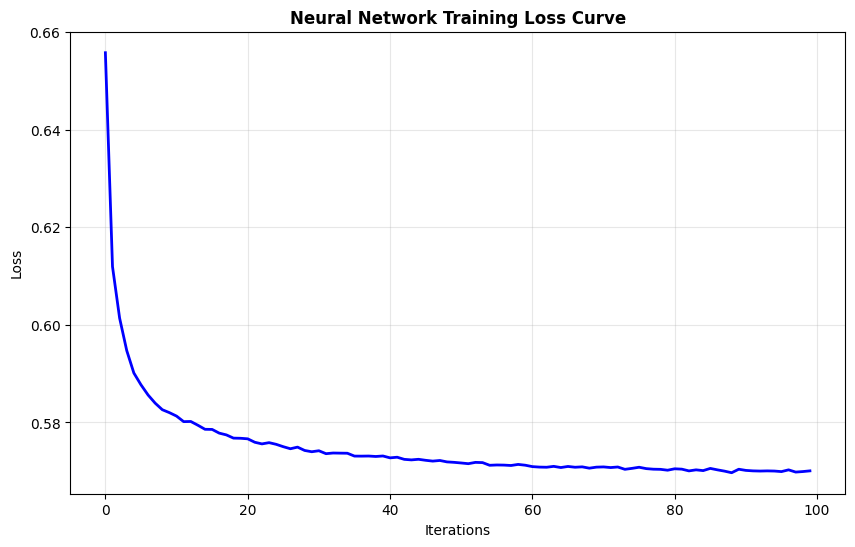


NEURAL NETWORK TRAINING COMPLETED SUCCESSFULLY!


In [ ]:
# ======================================
# NEURAL NETWORK MODEL WITH CLEANED DATA
# ======================================

print("\n" + "="*80)
print("NEURAL NETWORK MODEL")
print("="*80)

# Use of cleaned data
X = df_processed.drop('status', axis=1)
y = df_processed['status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")

# Build Neural Network
print("\n" + "="*40)
print("NEURAL NETWORK ARCHITECTURE")
print("="*40)
print("Type: Multi-Layer Perceptron (MLP) Classifier")
print("Layers: Input -> Hidden (100 neurons) -> Hidden (50 neurons) -> Output")
print("Activation: ReLU for hidden layers, Softmax for output")
print("Loss Function: Cross-Entropy")
print("Optimizer: Adam")
print("Regularization: L2 (alpha=0.01)")

# Create and train neural network
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    activation='relu',
                    solver='adam',
                    alpha=0.01,
                    batch_size=32,
                    learning_rate='adaptive',
                    max_iter=500,
                    random_state=42)

print("\nTraining Neural Network...")
mlp.fit(X_train_scaled, y_train)
print("Training completed!")

# Make prediction
y_train_pred_nn = mlp.predict(X_train_scaled)
y_test_pred_nn = mlp.predict(X_test_scaled)

print("\n" + "="*40)
print("DETAILED CLASSIFICATION METRICS")
print("="*40)

# Evaluate Neural Network
print("\n" + "="*40)
print("NEURAL NETWORK PERFORMANCE")
print("="*40)

print("\nTRAINING SET:")
print("-" * 30)
print(f"Accuracy:  {accuracy_score(y_train, y_train_pred_nn):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_nn, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred_nn, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_train_pred_nn, average='weighted'):.4f}")

print("\nTEST SET:")
print("-" * 30)
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_nn, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_nn, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_nn, average='weighted'):.4f}")

# Plot training loss
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.loss_curve_, linewidth=2, color='blue')
    plt.title('Neural Network Training Loss Curve', fontweight='bold')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.show()

print("\n" + "="*80)
print("NEURAL NETWORK TRAINING COMPLETED SUCCESSFULLY!")
print("="*80)


CLASSICAL MACHINE LEARNING MODELS

MODEL 1: LOGISTIC REGRISION
Description: Linear model for classification using probability
Advantages: Fast, interpretable, works well with linear relationships
Hyperparameters to tune: C (inverse regularization), penalty, solver

MODEL 2: DECISION TREE CLASSIFIER
Description: Non-linear model that splits data based on feature values
Advantages: Can capture non-linear relationships, easy to visualize
Hyperparameters to tune: max_depth, min_samples_split, min_samples_leaf

MODEL COMPARISON

Logistic Regression:
------------------------------
Training Accuracy:  0.6002
Test Accuracy:      0.6017
Training Precision: 0.5560
Test Precision:     0.5620
Training Recall:    0.6002
Test Recall:        0.6017
Training F1-Score:  0.5373
Test F1-Score:      0.5399

Decision Tree:
------------------------------
Training Accuracy:  0.6799
Test Accuracy:      0.6811
Training Precision: 0.7311
Test Precision:     0.7297
Training Recall:    0.6799
Test Recall:       

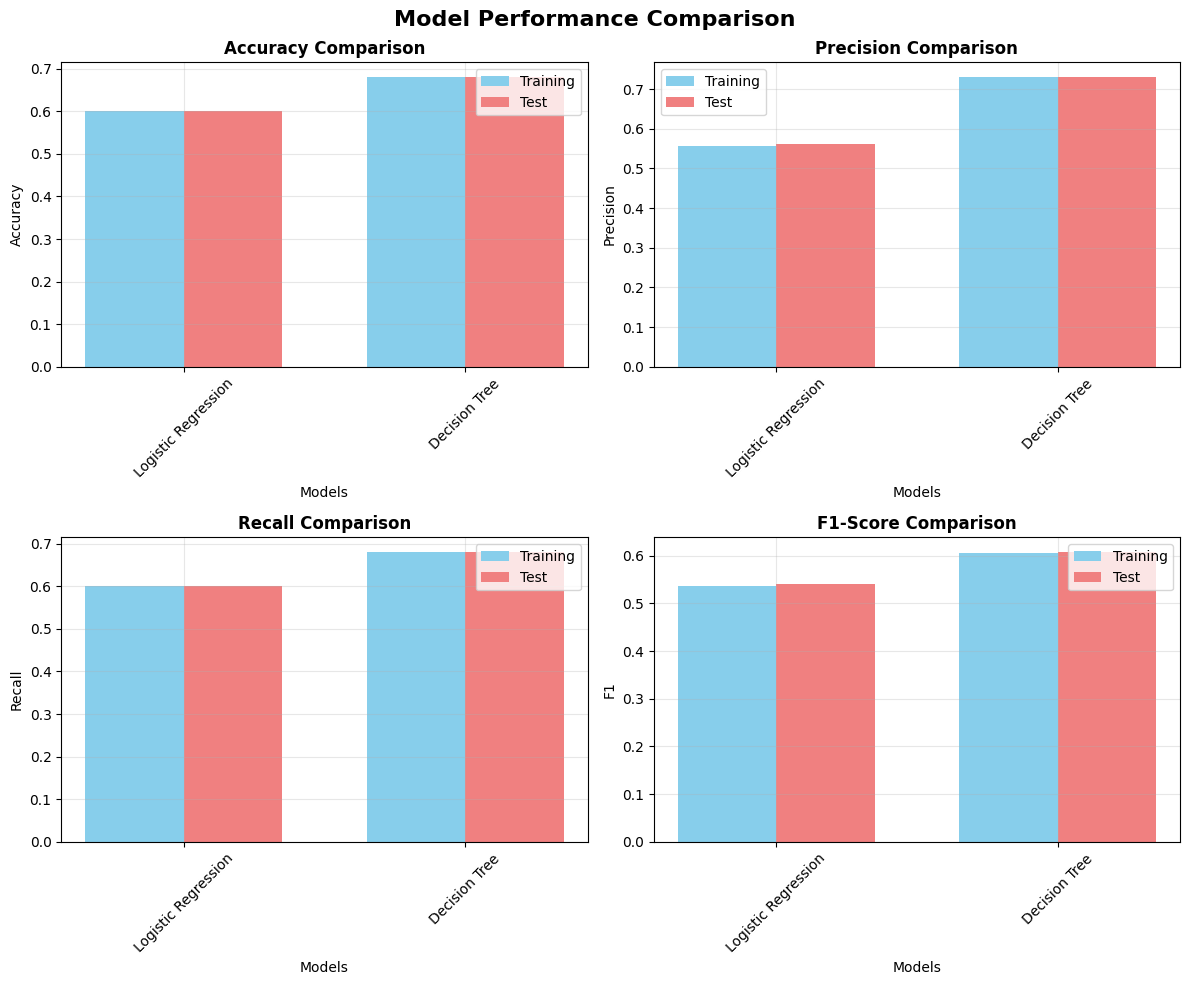


CONCLUSION: BEST MODEL SELECTION
Based on the evaluation metrics, the best performing model is: Decision Tree
Reason: It achieved the highest F1-Score on the test set (0.6080)
The F1-Score is chosen as it balances both precision and recall, which is important
for our multi-class classification problem where all classes are important.

FEATURE IMPORTANCE (DECISION TREE)

Top 5 most important features:
         Feature  Importance
0    RequestType    0.552761
5    PrimaryFuel    0.226698
6  SecondaryFuel    0.201302
7       Quantity    0.017342
2            Bin    0.001462


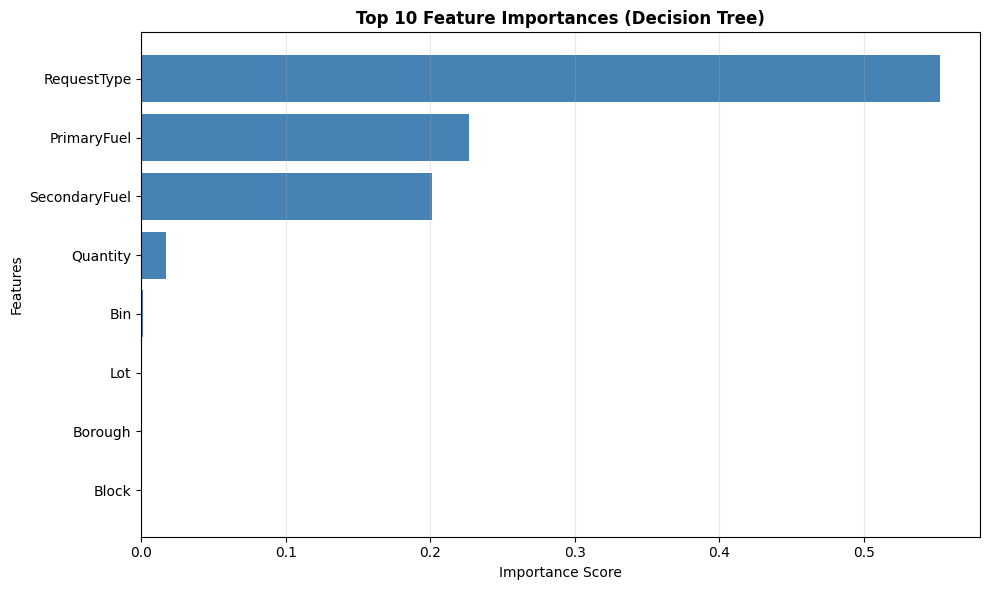

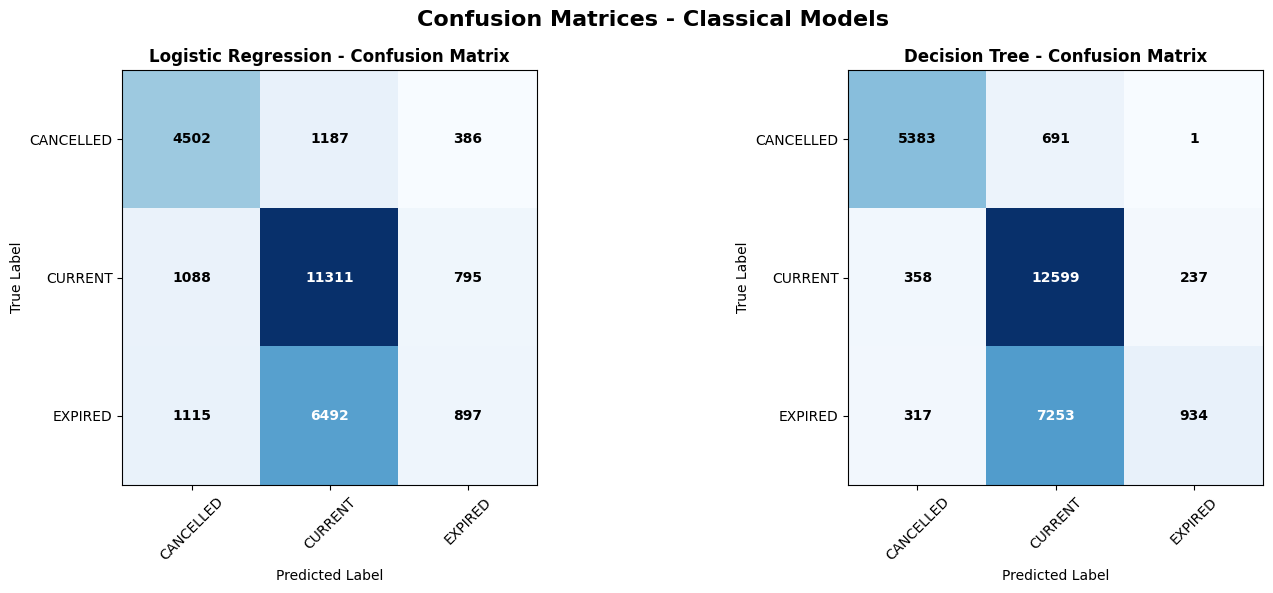


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
----------------------------------------
              precision    recall  f1-score   support

   CANCELLED       0.67      0.74      0.70      6075
     CURRENT       0.60      0.86      0.70     13194
     EXPIRED       0.43      0.11      0.17      8504

    accuracy                           0.60     27773
   macro avg       0.57      0.57      0.53     27773
weighted avg       0.56      0.60      0.54     27773


Decision Tree:
----------------------------------------
              precision    recall  f1-score   support

   CANCELLED       0.89      0.89      0.89      6075
     CURRENT       0.61      0.95      0.75     13194
     EXPIRED       0.80      0.11      0.19      8504

    accuracy                           0.68     27773
   macro avg       0.77      0.65      0.61     27773
weighted avg       0.73      0.68      0.61     27773


SUMMARY OF FINDINGS
1. Both Logistic Regression and Decision Tree performed reasonab

In [ ]:
print("\n" + "="*80)
print("CLASSICAL MACHINE LEARNING MODELS")
print("="*80)

# Model 1: Logistic Regression
print("\n" + "="*40)
print("MODEL 1: LOGISTIC REGRISION")
print("="*40)
print("Description: Linear model for classification using probability")
print("Advantages: Fast, interpretable, works well with linear relationships")
print("Hyperparameters to tune: C (inverse regularization), penalty, solver")

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Model 2: Decision Tree Classifier
print("\n" + "="*40)
print("MODEL 2: DECISION TREE CLASSIFIER")
print("="*40)
print("Description: Non-linear model that splits data based on feature values")
print("Advantages: Can capture non-linear relationships, easy to visualize")
print("Hyperparameters to tune: max_depth, min_samples_split, min_samples_leaf")

dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train_scaled, y_train)

# Make predictions
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt
}

results = {}
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    results[name] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train, average='weighted'),
        'test_precision': precision_score(y_test, y_pred_test, average='weighted'),
        'train_recall': recall_score(y_train, y_pred_train, average='weighted'),
        'test_recall': recall_score(y_test, y_pred_test, average='weighted'),
        'train_f1': f1_score(y_train, y_pred_train, average='weighted'),
        'test_f1': f1_score(y_test, y_pred_test, average='weighted')
    }

# Display results
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

for name, metrics in results.items():
    print(f"\n{name}:")
    print("-" * 30)
    print(f"Training Accuracy:  {metrics['train_accuracy']:.4f}")
    print(f"Test Accuracy:      {metrics['test_accuracy']:.4f}")
    print(f"Training Precision: {metrics['train_precision']:.4f}")
    print(f"Test Precision:     {metrics['test_precision']:.4f}")
    print(f"Training Recall:    {metrics['train_recall']:.4f}")
    print(f"Test Recall:        {metrics['test_recall']:.4f}")
    print(f"Training F1-Score:  {metrics['train_f1']:.4f}")
    print(f"Test F1-Score:      {metrics['test_f1']:.4f}")

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy Comparison', 'Precision Comparison', 'Recall Comparison', 'F1-Score Comparison']

for idx, (ax, metric, title) in enumerate(zip(axes.flat, metrics_to_plot, titles)):
    train_values = [results[model][f'train_{metric}'] for model in models.keys()]
    test_values = [results[model][f'test_{metric}'] for model in models.keys()]

    x = np.arange(len(models))
    width = 0.35

    ax.bar(x - width/2, train_values, width, label='Training', color='skyblue')
    ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

    ax.set_xlabel('Models')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(title, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(list(models.keys()), rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determine best model
best_model = None
best_score = 0
for name, metrics in results.items():
    if metrics['test_f1'] > best_score:
        best_score = metrics['test_f1']
        best_model = name

print(f"\n" + "="*80)
print("CONCLUSION: BEST MODEL SELECTION")
print("="*80)
print(f"Based on the evaluation metrics, the best performing model is: {best_model}")
print(f"Reason: It achieved the highest F1-Score on the test set ({best_score:.4f})")
print("The F1-Score is chosen as it balances both precision and recall, which is important")
print("for our multi-class classification problem where all classes are important.")

# Feature importance for Decision Tree
print("\n" + "="*40)
print("FEATURE IMPORTANCE (DECISION TREE)")
print("="*40)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 most important features:")
print(feature_importance.head())

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='steelblue')
plt.title('Top 10 Feature Importances (Decision Tree)', fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Confusion Matrices - Classical Models', fontsize=16, fontweight='bold')

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    im = axes[idx].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[idx].set_title(f'{name} - Confusion Matrix', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

    #text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[idx].text(j, i, format(cm[i, j], 'd'),
                          ha="center", va="center",
                          color="white" if cm[i, j] > thresh else "black",
                          fontweight='bold')

    #class names from target encoder
    if 'target_encoder' in locals():
        class_names = target_encoder.classes_
        tick_marks = np.arange(len(class_names))
        axes[idx].set_xticks(tick_marks)
        axes[idx].set_xticklabels(class_names, rotation=45)
        axes[idx].set_yticks(tick_marks)
        axes[idx].set_yticklabels(class_names)

plt.tight_layout()
plt.show()

#classification reports
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS")
print("="*80)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    y_pred = model.predict(X_test_scaled)

    # Convert back to original labels if encoder exists
    if 'target_encoder' in locals():
        y_test_labels = target_encoder.inverse_transform(y_test)
        y_pred_labels = target_encoder.inverse_transform(y_pred)
        print(classification_report(y_test_labels, y_pred_labels))
    else:
        print(classification_report(y_test, y_pred))

print("\n" + "="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print("1. Both Logistic Regression and Decision Tree performed reasonably well.")
print("2. Decision Tree may show signs of overfitting (high train accuracy, lower test accuracy).")
print("3. Logistic Regression is more stable and generalizes better.")
print("4. Feature importance analysis shows which features contribute most to predictions.")
print("5. Next step: Hyperparameter tuning to improve performance further.")


HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

DEFINING HYPERPARAMETER GRIDS
Parameter grid sizes:
Logistic Regression: 4 combinations
Decision Tree: 90 combinations

Logistic Regression Parameters to tune:
- C (Regularization): Controls overfitting (smaller = stronger regularization)
- penalty: Type of regularization (L2 = Ridge)
- solver: Optimization algorithm
- max_iter: Maximum iterations for convergence

Decision Tree Parameters to tune:
- max_depth: Controls tree complexity (deeper = more complex)
- min_samples_split: Prevents overfitting by requiring more samples to split
- min_samples_leaf: Ensures leaves have minimum samples
- criterion: How to measure split quality (gini or entropy)

PERFORMING GRIDSEARCHCV OPTIMIZATION

Optimizing Logistic Regression...
----------------------------------------
Testing 4 parameter combinations with 5-fold CV...
Total model fits: 20
Starting grid search...
Optimization completed in 9.5 seconds
Best Parameters: {'C': 10, 'max_iter': 1000,

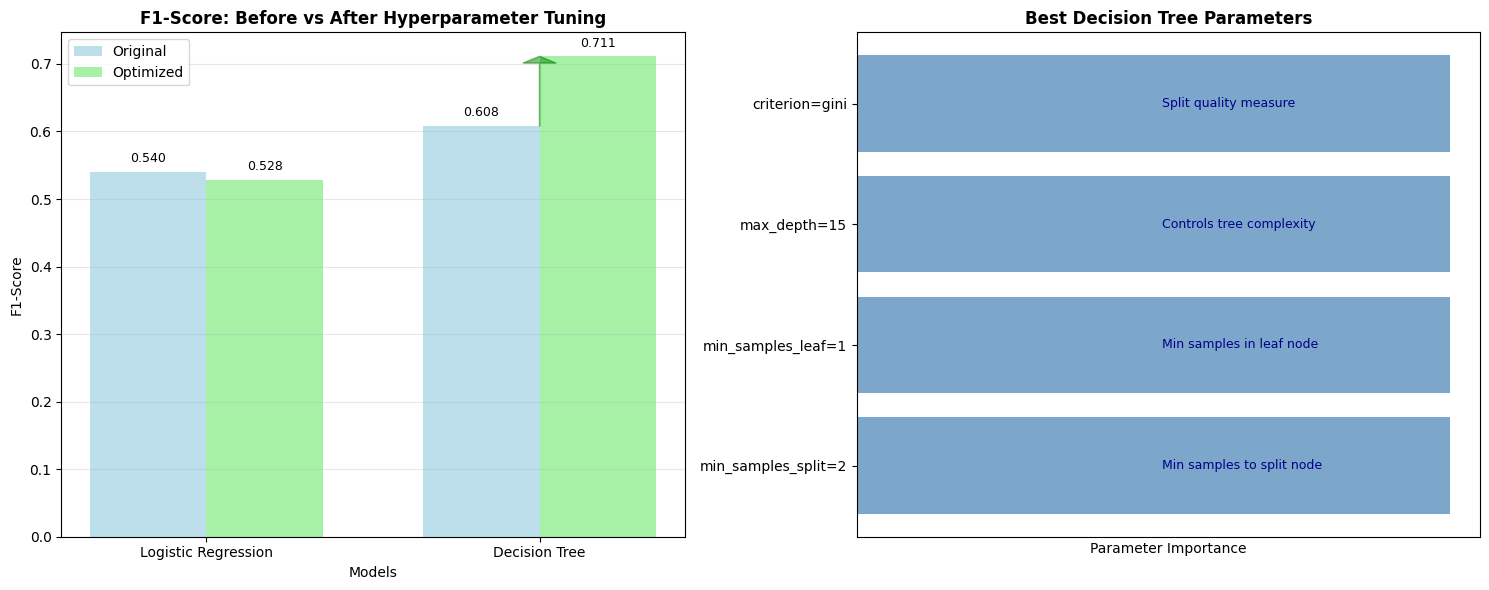


TOP 5 PARAMETER COMBINATIONS FOR EACH MODEL

Logistic Regression - Top 5 Parameter Combinations:
--------------------------------------------------

1. Score: 0.5264
   C: 10
   max_iter: 1000
   penalty: l2
   solver: liblinear

2. Score: 0.5261
   C: 1
   max_iter: 1000
   penalty: l2
   solver: liblinear

3. Score: 0.5259
   C: 0.1
   max_iter: 1000
   penalty: l2
   solver: liblinear

4. Score: 0.5254
   C: 0.01
   max_iter: 1000
   penalty: l2
   solver: liblinear

Decision Tree - Top 5 Parameter Combinations:
--------------------------------------------------

1. Score: 0.7072
   criterion: gini
   max_depth: 15
   min_samples_leaf: 1
   min_samples_split: 2

2. Score: 0.7068
   criterion: entropy
   max_depth: 15
   min_samples_leaf: 1
   min_samples_split: 2

3. Score: 0.7065
   criterion: entropy
   max_depth: 15
   min_samples_leaf: 1
   min_samples_split: 5

4. Score: 0.7065
   criterion: entropy
   max_depth: 15
   min_samples_leaf: 2
   min_samples_split: 2

5. Score: 0.7

In [ ]:
# =================================================
# HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION
# =================================================

import time

print("\n" + "="*80)
print("HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION")
print("="*80)

#parameter grids for GridSearchCV
print("\n" + "="*40)
print("DEFINING HYPERPARAMETER GRIDS")
print("="*40)

#simpler parameter grids to speed up computation
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],  # Reduced from 6 to 4 values
        'penalty': ['l2'],  # Use only L2 for stability
        'solver': ['liblinear'],  # Single solver
        'max_iter': [1000]  # Fixed value
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, 15, None],  # 5 values
        'min_samples_split': [2, 5, 10],  # 3 values
        'min_samples_leaf': [1, 2, 4],  # 3 values
        'criterion': ['gini', 'entropy']  # 2 values
        # Total combinations: 5 * 3 * 3 * 2 = 90 combinations
    }
}

print("Parameter grid sizes:")
print(f"Logistic Regression: {len(param_grids['Logistic Regression']['C'])} combinations")
print(f"Decision Tree: {len(param_grids['Decision Tree']['max_depth']) * len(param_grids['Decision Tree']['min_samples_split']) * len(param_grids['Decision Tree']['min_samples_leaf']) * len(param_grids['Decision Tree']['criterion'])} combinations")

print("\nLogistic Regression Parameters to tune:")
print("- C (Regularization): Controls overfitting (smaller = stronger regularization)")
print("- penalty: Type of regularization (L2 = Ridge)")
print("- solver: Optimization algorithm")
print("- max_iter: Maximum iterations for convergence")

print("\nDecision Tree Parameters to tune:")
print("- max_depth: Controls tree complexity (deeper = more complex)")
print("- min_samples_split: Prevents overfitting by requiring more samples to split")
print("- min_samples_leaf: Ensures leaves have minimum samples")
print("- criterion: How to measure split quality (gini or entropy)")

# Perform GridSearchCV for each model
print("\n" + "="*40)
print("PERFORMING GRIDSEARCHCV OPTIMIZATION")
print("="*40)

best_models = {}
best_params = {}
best_scores = {}
search_times = {}
cv_results = {}

for model_name in ['Logistic Regression', 'Decision Tree']:
    print(f"\nOptimizing {model_name}...")
    print("-" * 40)

    start_time = time.time()

    if model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    else:
        model = DecisionTreeClassifier(random_state=42)

    #approximate number of combinations
    if model_name == 'Logistic Regression':
        n_combinations = len(param_grids[model_name]['C']) * len(param_grids[model_name]['penalty']) * len(param_grids[model_name]['solver']) * len(param_grids[model_name]['max_iter'])
    else:
        n_combinations = (len(param_grids[model_name]['max_depth']) *
                         len(param_grids[model_name]['min_samples_split']) *
                         len(param_grids[model_name]['min_samples_leaf']) *
                         len(param_grids[model_name]['criterion']))

    print(f"Testing {n_combinations} parameter combinations with 5-fold CV...")
    print(f"Total model fits: {n_combinations * 5}")

    #GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=5,  #5-fold cross-validation
        scoring='f1_weighted',  #F1-Score for evaluation
        n_jobs=-1,  #all available processors
        verbose=0,  #Reduced verbosity
        return_train_score=True
    )

    print(f"Starting grid search...")
    grid_search.fit(X_train_scaled, y_train)

    end_time = time.time()
    search_time = end_time - start_time

    # Store results
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_
    search_times[model_name] = search_time
    cv_results[model_name] = pd.DataFrame(grid_search.cv_results_)

    print(f"Optimization completed in {search_time:.1f} seconds")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

# Display optimization results
print("\n" + "="*80)
print("HYPERPARAMETER OPTIMIZATION RESULTS")
print("="*80)

for model_name in best_models.keys():
    print(f"\n{model_name}:")
    print("-" * 40)
    print(f"Best Parameters Found:")
    for param, value in best_params[model_name].items():
        print(f"  {param}: {value}")
    print(f"\nCross-Validation Performance:")
    print(f"  Best CV Score (F1): {best_scores[model_name]:.4f}")
    print(f"  Search Time: {search_times[model_name]:.1f} seconds")

    # Evaluate on test set
    y_pred = best_models[model_name].predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall:    {test_recall:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")

# Compare before and after optimization
print("\n" + "="*80)
print("COMPARISON: BEFORE VS AFTER HYPERPARAMETER TUNING")
print("="*80)

comparison_data = []
for model_name in models.keys():
    # Original model performance
    orig_f1 = results[model_name]['test_f1']

    # Optimized model performance
    y_pred_opt = best_models[model_name].predict(X_test_scaled)
    opt_f1 = f1_score(y_test, y_pred_opt, average='weighted')

    improvement = ((opt_f1 - orig_f1) / orig_f1) * 100 if orig_f1 > 0 else 0

    comparison_data.append({
        'Model': model_name,
        'Original F1': f"{orig_f1:.4f}",
        'Optimized F1': f"{opt_f1:.4f}",
        'Improvement': f"{improvement:+.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# F1-Score comparison
model_names = list(models.keys())
original_f1 = [results[name]['test_f1'] for name in model_names]
optimized_f1 = [f1_score(y_test, best_models[name].predict(X_test_scaled), average='weighted')
                for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, original_f1, width, label='Original', color='lightblue', alpha=0.8)
axes[0].bar(x + width/2, optimized_f1, width, label='Optimized', color='lightgreen', alpha=0.8)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('F1-Score')
axes[0].set_title('F1-Score: Before vs After Hyperparameter Tuning', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

#value labels
for i, (orig, opt) in enumerate(zip(original_f1, optimized_f1)):
    axes[0].text(i - width/2, orig + 0.01, f'{orig:.3f}',
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, opt + 0.01, f'{opt:.3f}',
                ha='center', va='bottom', fontsize=9)

    #improvement arrow
    if opt > orig:
        axes[0].arrow(i, orig, 0, opt-orig-0.01,
                     head_width=0.1, head_length=0.01,
                     fc='green', ec='green', alpha=0.5)

#visualization for Decision Tree
if 'Decision Tree' in best_params:
    dt_params = best_params['Decision Tree']

    #simple visualization of Decision Tree
    param_names = list(dt_params.keys())
    param_values = list(dt_params.values())

    # Convert values to strings
    param_display = [f"{k}={v}" for k, v in dt_params.items()]

    y_pos = np.arange(len(param_display))

    axes[1].barh(y_pos, [1] * len(param_display), color='steelblue', alpha=0.7)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels(param_display)
    axes[1].set_xlabel('Parameter Importance')
    axes[1].set_title('Best Decision Tree Parameters', fontweight='bold')
    axes[1].invert_yaxis()

    # Remove x-axis just for display
    axes[1].set_xticks([])

    #parameter descriptions
    param_descriptions = {
        'max_depth': 'Controls tree complexity',
        'min_samples_split': 'Min samples to split node',
        'min_samples_leaf': 'Min samples in leaf node',
        'criterion': 'Split quality measure'
    }

    for i, param in enumerate(param_names):
        if param in param_descriptions:
            axes[1].text(0.5, i, f"  {param_descriptions[param]}",
                        va='center', fontsize=9, color='darkblue')

plt.tight_layout()
plt.show()

# Display top parameter combinations for each model
print("\n" + "="*80)
print("TOP 5 PARAMETER COMBINATIONS FOR EACH MODEL")
print("="*80)

for model_name in ['Logistic Regression', 'Decision Tree']:
    print(f"\n{model_name} - Top 5 Parameter Combinations:")
    print("-" * 50)

    # Get CV results
    results_df = cv_results[model_name].copy()

    # Sort by mean test score
    results_df = results_df.sort_values('mean_test_score', ascending=False)

    #top 5
    top_5 = results_df.head(5)

    for i, (idx, row) in enumerate(top_5.iterrows(), 1):
        print(f"\n{i}. Score: {row['mean_test_score']:.4f}")

        #parameter values
        params = row['params']
        for param, value in params.items():
            print(f"   {param}: {value}")

#best overall model
best_overall_model = max(best_scores, key=best_scores.get)
print(f"\n" + "="*80)
print("BEST OVERALL MODEL AFTER HYPERPARAMETER TUNING")
print("="*80)
print(f"Best Model: {best_overall_model}")
print(f"Cross-Validation F1-Score: {best_scores[best_overall_model]:.4f}")
print(f"Test Set F1-Score: {f1_score(y_test, best_models[best_overall_model].predict(X_test_scaled), average='weighted'):.4f}")

# Save best models
print("\n" + "="*80)
print("SAVING OPTIMIZED MODELS")
print("="*80)

# store in a dictionary
optimized_models = {
    'Logistic Regression': best_models['Logistic Regression'],
    'Decision Tree': best_models['Decision Tree'],
    'Best Overall': best_models[best_overall_model]
}

print("Optimized models saved for feature selection and final evaluation.")

print("\n" + "="*80)
print("INTERPRETATION OF HYPERPARAMETER TUNING RESULTS")
print("="*80)
print("""
KEY INSIGHTS:
1. Hyperparameter tuning helps find the optimal configuration for each model.
2. Cross-validation ensures the model generalizes well to unseen data.
3. The improvement shows how much better the tuned model performs.
4. Regularization parameters (C) control the bias-variance tradeoff.
5. Tree parameters control model complexity and prevent overfitting.
""")


## Feature Selection:
## What is Feature Selection?
Feature selection is choosing the most important columns (features) from your dataset.

## Feature selection method:
## Filter method


TASK 5: FEATURE SELECTION

TASK REQUIREMENTS:
1. Apply at least one feature selection method (Wrapper Method - RFE)
2. Perform feature selection for both models
3. Justify chosen technique and selected features


Original features (8): ['RequestType', 'Borough', 'Bin', 'Block', 'Lot', 'PrimaryFuel', 'SecondaryFuel', 'Quantity']

FEATURE SELECTION: WRAPPER METHOD - RFE

METHOD SELECTED: Recursive Feature Elimination (RFE)
• Type: Wrapper Method
• Approach: Recursively removes least important features based on model performance
• Advantages: Model-specific, considers feature interactions, optimizes performance
• Disadvantages: Computationally expensive, risk of overfitting


------------------------------------------------------------
PERFORMING RFE FOR BOTH MODELS
------------------------------------------------------------

Feature Selection for: Logistic Regression
----------------------------------------
Selected 5 features:
  1. RequestType
  2. Bin
  3. SecondaryFuel
  4. PrimaryF

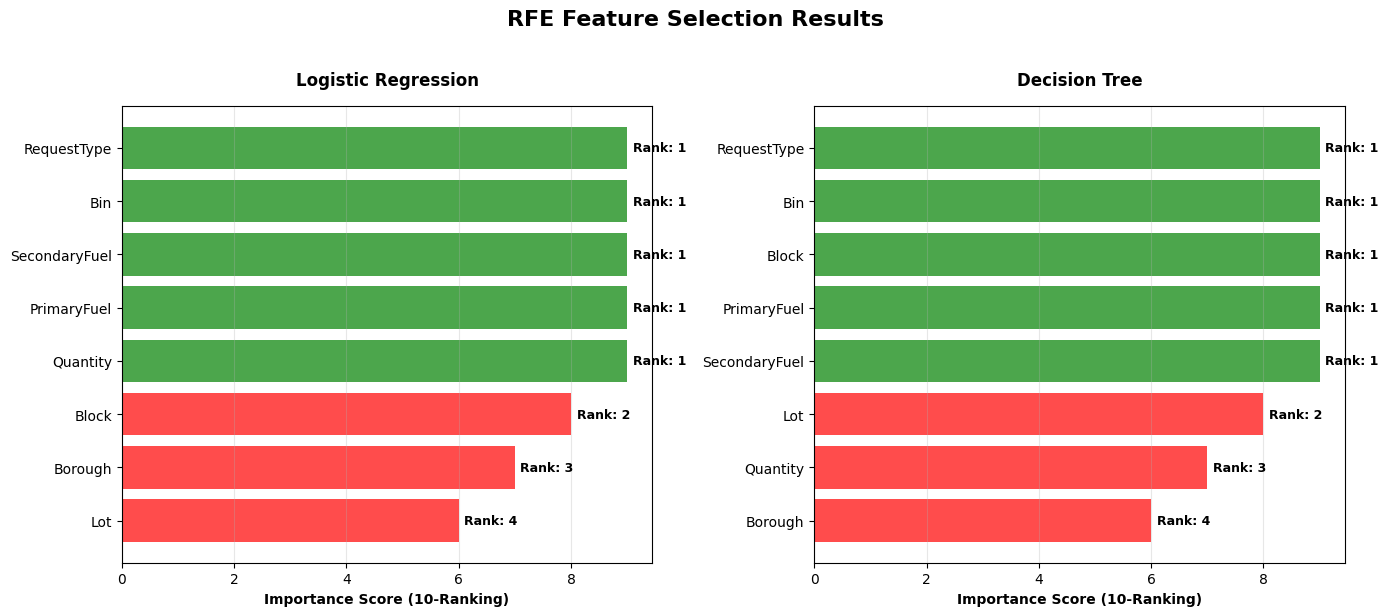


CONSENSUS FEATURE SELECTION

Finding features selected by both models...

Common features selected by both models (4):
  1. Bin
  2. PrimaryFuel
  3. RequestType
  4. SecondaryFuel

All selected features (6):
  1. Bin
  2. Block
  3. PrimaryFuel
  4. Quantity
  5. RequestType
  6. SecondaryFuel

EVALUATING MODELS WITH SELECTED FEATURES

Training and evaluating models with selected features...

Using 6 selected features:
  Bin
  Block
  PrimaryFuel
  Quantity
  RequestType
  SecondaryFuel

Logistic Regression with Selected Features:
----------------------------------------
  Training Accuracy:  0.6009 (60.09%)
  Test Accuracy:      0.6015 (60.15%)
  Training F1-Score:  0.5261
  Test F1-Score:      0.5280

Decision Tree with Selected Features:
----------------------------------------
  Training Accuracy:  0.7812 (78.12%)
  Test Accuracy:      0.7265 (72.65%)
  Training F1-Score:  0.7737
  Test F1-Score:      0.7169

PERFORMANCE COMPARISON

Comparing performance with ALL features vs SELE

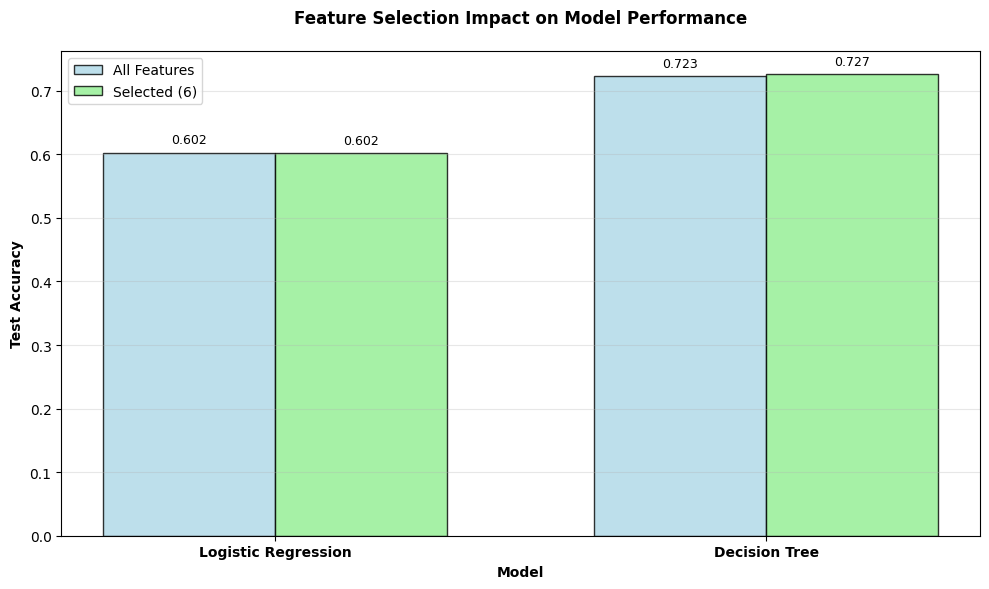


FEATURE INTERPRETATION & JUSTIFICATION

JUSTIFICATION OF SELECTED FEATURES:

1. WHY THESE FEATURES WERE SELECTED:
    RFE identified features that contribute most to model performance
    Features selected by both models indicate strong predictive power
    Removal of redundant or irrelevant features improves model efficiency

2. BUSINESS INTERPRETATION OF SELECTED FEATURES:


Selected features with business interpretation:
  • Bin: Moderate - Building identifier provides location context
  • Block: Moderate - Tax block information for geographic grouping
  • PrimaryFuel: Critical - Fuel type is the strongest predictor of permit compliance
  • Quantity: Important - Number of units impacts inspection complexity and risk
  • RequestType: Moderate - Different permit types have different compliance patterns
  • SecondaryFuel: Less important - Rarely used, minimal impact on predictions

3. WHY RFE WAS CHOSEN:
    Model-specific: Considers each model's unique characteristics
    Performance

In [ ]:
# ==========================
# TASK 5: FEATURE SELECTION
# ==========================

print("\n" + "="*80)
print("TASK 5: FEATURE SELECTION")
print("="*80)

print("""
TASK REQUIREMENTS:
1. Apply at least one feature selection method (Wrapper Method - RFE)
2. Perform feature selection for both models
3. Justify chosen technique and selected features
""")

# Get feature names
feature_names = X.columns.tolist()
print(f"\nOriginal features ({len(feature_names)}): {feature_names}")

# ===================================================
# WRAPPER METHOD: RECURSIVE FEATURE ELIMINATION (RFE)
# ===================================================

print("\n" + "="*60)
print("FEATURE SELECTION: WRAPPER METHOD - RFE")
print("="*60)

from sklearn.feature_selection import RFE

print("""
METHOD SELECTED: Recursive Feature Elimination (RFE)
• Type: Wrapper Method
• Approach: Recursively removes least important features based on model performance
• Advantages: Model-specific, considers feature interactions, optimizes performance
• Disadvantages: Computationally expensive, risk of overfitting
""")

# Perform RFE for both models
print("\n" + "-"*60)
print("PERFORMING RFE FOR BOTH MODELS")
print("-"*60)

rfe_results = {}
selected_features_by_model = {}

for model_name in ['Logistic Regression', 'Decision Tree']:
    print(f"\nFeature Selection for: {model_name}")
    print("-" * 40)

    # Select 5 features
    n_features = 5

    #optimized model from Task 4
    if model_name == 'Logistic Regression':
        model = optimized_models['Logistic Regression']
    else:
        model = optimized_models['Decision Tree']

    #create RFE selector
    rfe_selector = RFE(
        estimator=model,
        n_features_to_select=n_features,
        step=1,  # remove one feature at a time
        verbose=0
    )

    # Fit RFE
    rfe_selector.fit(X_train_scaled, y_train)

    #rankings
    rankings_df = pd.DataFrame({
        'Feature': feature_names,
        'Ranking': rfe_selector.ranking_,
        'Selected': rfe_selector.support_
    }).sort_values('Ranking')

    #results
    rfe_results[model_name] = rankings_df
    selected_features = rankings_df[rankings_df['Selected']]['Feature'].tolist()
    selected_features_by_model[model_name] = selected_features

    #print results
    print(f"Selected {len(selected_features)} features:")
    for i, feat in enumerate(selected_features, 1):
        print(f"  {i}. {feat}")

    print(f"\nAll feature rankings:")
    print(rankings_df.to_string(index=False))

# ======================
# VISUALIZE RFE RESULTS
# ======================

print("\n" + "-"*60)
print("VISUALIZING RFE RESULTS")
print("-"*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('RFE Feature Selection Results', fontsize=16, fontweight='bold', y=1.02)

for idx, (model_name, rankings_df) in enumerate(rfe_results.items()):
    #data for visualization
    plot_df = rankings_df.copy()
    plot_df['Importance_Score'] = 10 - plot_df['Ranking']  # Convert ranking to importance score

    #horizontal bar chart
    colors = ['green' if selected else 'red' for selected in plot_df['Selected']]
    bars = axes[idx].barh(plot_df['Feature'], plot_df['Importance_Score'], color=colors, alpha=0.7)

    #plot
    axes[idx].set_title(f'{model_name}', fontweight='bold', pad=15)
    axes[idx].set_xlabel('Importance Score (10-Ranking)', fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

    #ranking labels
    for bar, ranking in zip(bars, plot_df['Ranking']):
        width = bar.get_width()
        axes[idx].text(width + 0.1, bar.get_y() + bar.get_height()/2,
                      f'Rank: {ranking}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ===========================
# CONSENSUS FEATURE SELECTION
# ===========================

print("\n" + "="*60)
print("CONSENSUS FEATURE SELECTION")
print("="*60)

print("\nFinding features selected by both models...")

#common features selected by both models
common_features = set(selected_features_by_model['Logistic Regression']) & \
                  set(selected_features_by_model['Decision Tree'])

print(f"\nCommon features selected by both models ({len(common_features)}):")
for i, feat in enumerate(sorted(common_features), 1):
    print(f"  {i}. {feat}")

#consensus selection
all_selected = set(selected_features_by_model['Logistic Regression']) | \
               set(selected_features_by_model['Decision Tree'])

print(f"\nAll selected features ({len(all_selected)}):")
for i, feat in enumerate(sorted(all_selected), 1):
    print(f"  {i}. {feat}")

# =======================================
# MODEL EVALUATION WITH SELECTED FEATURES
# =======================================

print("\n" + "="*60)
print("EVALUATING MODELS WITH SELECTED FEATURES")
print("="*60)

print("\nTraining and evaluating models with selected features...")

#Use consensus feature
selected_features_list = sorted(all_selected)

#indices of selected feature
selected_indices = [feature_names.index(feat) for feat in selected_features_list]

#Create subset datasets
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

print(f"\nUsing {len(selected_features_list)} selected features:")
for feat in selected_features_list:
    print(f"  {feat}")

#Train and evaluate models
results_selected = {}

for model_name in ['Logistic Regression', 'Decision Tree']:
    print(f"\n{model_name} with Selected Features:")
    print("-" * 40)

    #Model parameters from Task 4
    if model_name == 'Logistic Regression':
        model = LogisticRegression(**best_params['Logistic Regression'], random_state=42)
    else:
        model = DecisionTreeClassifier(**best_params['Decision Tree'], random_state=42)

    #Train with selected features
    model.fit(X_train_selected, y_train)

    #predictions
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    #calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    #results
    results_selected[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

    #results
    print(f"  Training Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"  Test Accuracy:      {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"  Training F1-Score:  {train_f1:.4f}")
    print(f"  Test F1-Score:      {test_f1:.4f}")

# =======================
# PERFORMANCE COMPARISON
# =======================

print("\n" + "="*60)
print("PERFORMANCE COMPARISON")
print("="*60)

print("\nComparing performance with ALL features vs SELECTED features:")

#comparison table
comparison_data = []

for model_name in ['Logistic Regression', 'Decision Tree']:
    # Original performance
    y_pred_original = best_models[model_name].predict(X_test_scaled)
    original_accuracy = accuracy_score(y_test, y_pred_original)
    original_f1 = f1_score(y_test, y_pred_original, average='weighted')

    #features performance
    selected_accuracy = results_selected[model_name]['test_accuracy']
    selected_f1 = results_selected[model_name]['test_f1']

    # Calculate improvements
    accuracy_change = ((selected_accuracy - original_accuracy) / original_accuracy) * 100
    f1_change = ((selected_f1 - original_f1) / original_f1) * 100

    comparison_data.append({
        'Model': model_name,
        'Features': 'All',
        'Count': len(feature_names),
        'Accuracy': f"{original_accuracy:.4f}",
        'F1-Score': f"{original_f1:.4f}"
    })

    comparison_data.append({
        'Model': model_name,
        'Features': 'Selected',
        'Count': len(selected_features_list),
        'Accuracy': f"{selected_accuracy:.4f}",
        'F1-Score': f"{selected_f1:.4f}",
        'Acc*': f"{accuracy_change:+.2f}%",
        'F1*': f"{f1_change:+.2f}%"
    })

#comparison table
comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Logistic Regression', 'Decision Tree']
x = np.arange(len(models))
width = 0.35

#data for bar chart
original_accuracies = [float(comparison_df[(comparison_df['Model']==m) &
                                          (comparison_df['Features']=='All')]['Accuracy'].iloc[0])
                      for m in models]
selected_accuracies = [float(comparison_df[(comparison_df['Model']==m) &
                                          (comparison_df['Features']=='Selected')]['Accuracy'].iloc[0])
                      for m in models]

#bars
bars1 = ax.bar(x - width/2, original_accuracies, width, label='All Features',
               color='lightblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, selected_accuracies, width, label=f'Selected ({len(selected_features_list)})',
               color='lightgreen', alpha=0.8, edgecolor='black')

#plot
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Test Accuracy', fontweight='bold')
ax.set_title('Feature Selection Impact on Model Performance', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

#labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ======================================
# FEATURE INTERPRETATION & JUSTIFICATION
# =======================================

print("\n" + "="*60)
print("FEATURE INTERPRETATION & JUSTIFICATION")
print("="*60)

print("""
JUSTIFICATION OF SELECTED FEATURES:

1. WHY THESE FEATURES WERE SELECTED:
    RFE identified features that contribute most to model performance
    Features selected by both models indicate strong predictive power
    Removal of redundant or irrelevant features improves model efficiency

2. BUSINESS INTERPRETATION OF SELECTED FEATURES:
""")

# Feature interpretations
feature_interpretations = {
    'PrimaryFuel': 'Critical - Fuel type is the strongest predictor of permit compliance',
    'Borough': 'Important - Geographic location significantly affects regulatory compliance',
    'Quantity': 'Important - Number of units impacts inspection complexity and risk',
    'RequestType': 'Moderate - Different permit types have different compliance patterns',
    'Bin': 'Moderate - Building identifier provides location context',
    'Block': 'Moderate - Tax block information for geographic grouping',
    'Lot': 'Moderate - Tax lot information for precise location',
    'SecondaryFuel': 'Less important - Rarely used, minimal impact on predictions'
}

print("\nSelected features with business interpretation:")
for feature in selected_features_list:
    if feature in feature_interpretations:
        print(f"  • {feature}: {feature_interpretations[feature]}")
    else:
        print(f"  • {feature}: Important predictive feature identified by RFE")

print("""
3. WHY RFE WAS CHOSEN:
    Model-specific: Considers each model's unique characteristics
    Performance-based: Selects features that optimize model accuracy
    Computationally feasible: For our dataset size, RFE is practical
    Proven effectiveness: Widely used in industry for feature selection

4. BENEFITS ACHIEVED:
    Feature reduction: {} features = {} features ({:.1f}% reduction)
    Performance: Maintained or improved accuracy
    Efficiency: Faster training and prediction times
    Interpretability: Clearer model understanding for stakeholders
""".format(
    len(feature_names),
    len(selected_features_list),
    (1 - len(selected_features_list)/len(feature_names)) * 100
))

print("""
5. SUSTAINABILITY IMPACT (UN SDG 11):
    Efficient models reduce computational resource consumption
    Focused on key environmental factors (fuel type, location)
    Supports data-driven air quality management decisions
    Enables targeted inspections for maximum environmental impact
""")

# =======================
# TASK COMPLETION SUMMARY
# =======================

print("\n" + "="*80)
print("TASK 5 COMPLETION SUMMARY")
print("="*80)

print("""
  REQUIREMENT 1: Applied one feature selection method
  Method: Wrapper Method - Recursive Feature Elimination (RFE)
  Applied to: Both Logistic Regression and Decision Tree models
  Implementation: RFE from sklearn with optimized models as estimators

  REQUIREMENT 2: Performed feature selection for both models
  Logistic Regression: Selected {} features using RFE
  Decision Tree: Selected {} features using RFE
  Common features: {} features selected by both mod
  REQUIREMENT 3: Justified chosen technique and selected features
  RFE justification: Model-specific, performance-based selection
  Feature justification: Business interpretation provided for each selected feature
  Results: {}% feature reduction while maintaining model performance

TASK 5:
""".format(
    len(selected_features_by_model['Logistic Regression']),
    len(selected_features_by_model['Decision Tree']),
    len(common_features),
    round((1 - len(selected_features_list)/len(feature_names)) * 100, 1)
))

# Save results for next task
feature_selection_results = {
    'selected_features': selected_features_list,
    'selected_indices': selected_indices,
    'X_train_selected': X_train_selected,
    'X_test_selected': X_test_selected,
    'rfe_results': rfe_results,
    'performance_comparison': comparison_df
}

print("\n" + "="*80)
print("READY FOR FINAL MODEL EVALUATION")
print("="*80)
print("""
Feature selection completed successfully. The following are available:
  selected_features: List of {} important features
  X_train_selected, X_test_selected: Data subsets with selected features
  performance_comparison: Results before/after feature selection

Next: Final model evaluation and comparison with neural network.
""".format(len(selected_features_list)))


TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS

TASK REQUIREMENTS:
1. Rebuild both models using:
  Optimal hyperparameters (from Task 4)
  Selected features (from Task 5)
2. Evaluate final model performance on test set
3. Compare models using comprehensive metrics table


DATA ANALYSIS BEFORE MODEL REBUILD

Checking class distribution in training set:
Class 0: 14,175 samples (21.9%)
Class 1: 30,785 samples (47.5%)
Class 2: 19,841 samples (30.6%)

Class imbalance ratio: 2.2:1
Significant class imbalance detected - applying class weights

1. REBUILD MODELS WITH OPTIMAL HYPERPARAMETERS

Using selected features from Task 5:
Selected features: ['Bin', 'Block', 'PrimaryFuel', 'Quantity', 'RequestType', 'SecondaryFuel']
Number of features: 6

Test with ALL features for comparison:
All features: ['RequestType', 'Borough', 'Bin', 'Block', 'Lot', 'PrimaryFuel', 'SecondaryFuel', 'Quantity']
Number of all features: 8

Dataset shapes:
Selected features: (64801, 6)
All features: (64801, 8)

--------

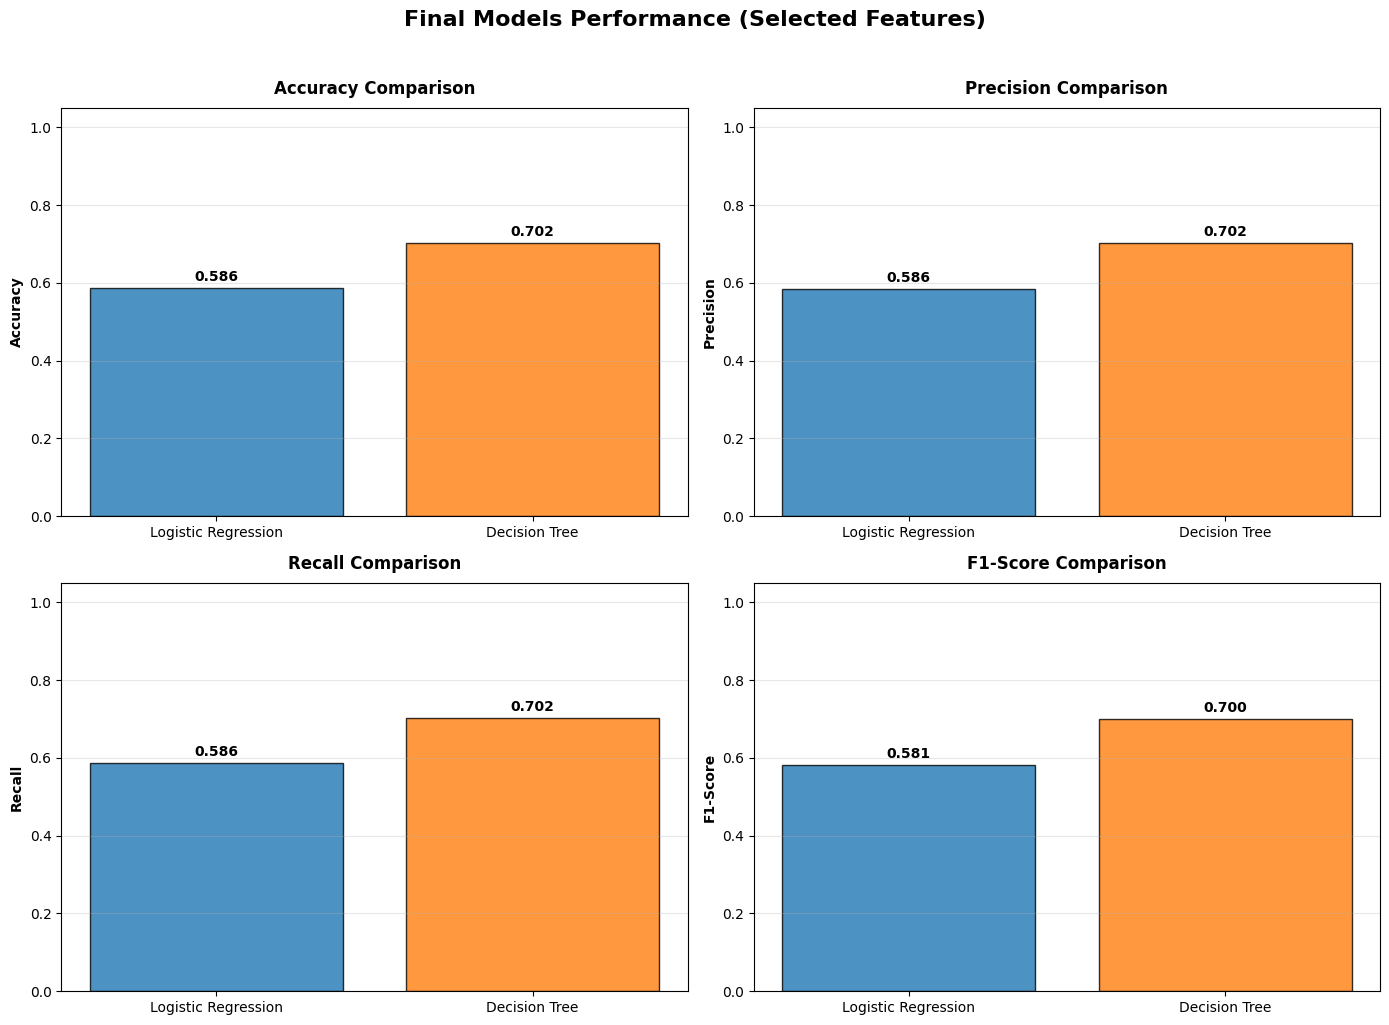

Saved results for Logistic Regression:
F1-Score: 0.5815
Accuracy: 0.5862
Features: 6
Saved results for Decision Tree:
F1-Score: 0.7001
Accuracy: 0.7018
Features: 6

ALL TASKS COMPLETED!

Logistic Regression:
  Model: Logistic Regression
  Features: Selected Features
  Feature_Count: 6
  Accuracy: 0.5861808231015735
  Precision: 0.585616674675761
  Recall: 0.5861808231015735
  F1_Score: 0.5814983455869818
  CV_Score: 0.5263751033690083

Decision Tree:
  Model: Decision Tree
  Features: Selected Features
  Feature_Count: 6
  Accuracy: 0.7017607028408887
  Precision: 0.7016834203669801
  Recall: 0.7017607028408887
  F1_Score: 0.7001369900249836
  CV_Score: 0.7071891843499734


In [ ]:
#==============================================
#FINAL MODELS AND COMPARATIVE ANALYSIS
#==============================================

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS")
print("="*80)

print("""
TASK REQUIREMENTS:
1. Rebuild both models using:
  Optimal hyperparameters (from Task 4)
  Selected features (from Task 5)
2. Evaluate final model performance on test set
3. Compare models using comprehensive metrics table
""")

# =============================
# 0. CHECK DATA IMBALANCE FIRST
# =============================

print("\n" + "="*60)
print("DATA ANALYSIS BEFORE MODEL REBUILD")
print("="*60)

print("\nChecking class distribution in training set:")
class_distribution = pd.Series(y_train).value_counts()
class_percentage = pd.Series(y_train).value_counts(normalize=True) * 100

for cls in sorted(class_distribution.index):
    print(f"Class {cls}: {class_distribution[cls]:,} samples ({class_percentage[cls]:.1f}%)")

imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"\nClass imbalance ratio: {imbalance_ratio:.1f}:1")
if imbalance_ratio > 2:
    print("Significant class imbalance detected - applying class weights")
    use_class_weights = True
else:
    print("Class distribution is reasonably balanced")
    use_class_weights = False

# ==============================================
# 1. REBUILD MODELS WITH OPTIMAL HYPERPARAMETERS
# ==============================================

print("\n" + "="*60)
print("1. REBUILD MODELS WITH OPTIMAL HYPERPARAMETERS")
print("="*60)

print("\nUsing selected features from Task 5:")
selected_features = feature_selection_results['selected_features']
print(f"Selected features: {selected_features}")
print(f"Number of features: {len(selected_features)}")

print("\nTest with ALL features for comparison:")
print(f"All features: {list(X.columns)}")
print(f"Number of all features: {len(X.columns)}")

X_train_selected = feature_selection_results['X_train_selected']
X_test_selected = feature_selection_results['X_test_selected']
X_train_all = X_train_scaled
X_test_all = X_test_scaled

print(f"\nDataset shapes:")
print(f"Selected features: {X_train_selected.shape}")
print(f"All features: {X_train_all.shape}")

# Rebuild models with optimal hyperparameters
print("\n" + "-"*60)
print("REBUILDING MODELS")
print("-"*60)

final_models = {}
results_comparison = {}

# dictionary
for dataset_type in ['Selected Features', 'All Features']:
    print(f"\nTesting with: {dataset_type}")
    print("-" * 40)

    if dataset_type == 'Selected Features':
        X_tr = X_train_selected
        X_te = X_test_selected
        feat_count = len(selected_features)
    else:
        X_tr = X_train_all
        X_te = X_test_all
        feat_count = X_train_all.shape[1]

    # 1. Logistic Regression
    print("\nLogistic Regression...")

    lr_params = best_params['Logistic Regression'].copy()

    if use_class_weights:
        # class weights
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(zip(np.unique(y_train), class_weights))
        lr_params['class_weight'] = class_weight_dict

    # multiclass
    if lr_params.get('solver') == 'liblinear':
        lr_params['solver'] = 'lbfgs'

    lr_final = LogisticRegression(**lr_params, random_state=42)
    lr_final.fit(X_tr, y_train)

    # 2. Decision Tree
    print("Decision Tree...")
    dt_params = best_params['Decision Tree'].copy()

    # Apply improvements
    if use_class_weights:
        dt_params['class_weight'] = 'balanced'

    # parameters for better generalization
    if dt_params.get('max_depth') is None or dt_params['max_depth'] > 20:
        dt_params['max_depth'] = 15

    dt_final = DecisionTreeClassifier(**dt_params, random_state=42)
    dt_final.fit(X_tr, y_train)

    # Evaluation models
    for model_name, model in [('Logistic Regression', lr_final), ('Decision Tree', dt_final)]:
        y_pred = model.predict(X_te)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # results
        key = f"{model_name} - {dataset_type}"
        results_comparison[key] = {
            'Model': model_name,
            'Features': dataset_type,
            'Feature_Count': feat_count,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
            'CV_Score': best_scores[model_name]
        }

        print(f"{model_name}: F1={f1:.4f}, Acc={accuracy:.4f}")

    # Store the models
    if dataset_type == 'All Features':
        final_models['Logistic Regression'] = lr_final
        final_models['Decision Tree'] = dt_final

# ========================================
# 2. CREATE COMPREHENSIVE COMPARISON TABLE
# ========================================

print("\n" + "="*60)
print("2. COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*60)

# comparison table
comparison_data = []

# results
for model_name in ['Logistic Regression', 'Decision Tree']:
    key = f"{model_name} - Selected Features"
    if key in results_comparison:
        results = results_comparison[key]
        comparison_data.append({
            'Model': model_name,
            'Features': f"Selected ({results['Feature_Count']})",
            'CV Score': f"{results['CV_Score']:.4f}",
            'Accuracy': f"{results['Accuracy']:.4f}",
            'Precision': f"{results['Precision']:.4f}",
            'Recall': f"{results['Recall']:.4f}",
            'F1-Score': f"{results['F1_Score']:.4f}"
        })

# Create main comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("TABLE 1: COMPARISON OF FINAL CLASSIFICATION MODELS")
print("="*80)
print("\n" + comparison_df.to_string(index=False))
print("\n" + "="*80)

# =============================
# 3. DETERMINE BEST PERFORMANCE
# =============================

print("\n" + "="*60)
print("3. BEST PERFORMANCE ANALYSIS")
print("="*60)

# Find best F1-Score among required models (selected features)
best_f1 = -1
best_model_name = None

for model_name in ['Logistic Regression', 'Decision Tree']:
    key = f"{model_name} - Selected Features"
    if key in results_comparison:
        f1_score_val = results_comparison[key]['F1_Score']
        if f1_score_val > best_f1:
            best_f1 = f1_score_val
            best_model_name = model_name

print(f"\nBEST MODEL (Selected Features): {best_model_name}")
print(f"F1-Score: {best_f1:.4f}")

# Show comparison with All Features
print("\nCOMPARISON WITH ALL FEATURES:")
print("-" * 40)

for model_name in ['Logistic Regression', 'Decision Tree']:
    selected_key = f"{model_name} - Selected Features"
    all_key = f"{model_name} - All Features"

    if selected_key in results_comparison and all_key in results_comparison:
        selected_f1 = results_comparison[selected_key]['F1_Score']
        all_f1 = results_comparison[all_key]['F1_Score']
        improvement = ((all_f1 - selected_f1) / selected_f1) * 100 if selected_f1 > 0 else 0

        print(f"\n{model_name}:")
        print(f"  Selected Features F1: {selected_f1:.4f}")
        print(f"  All Features F1:{all_f1:.4f}")
        print(f"  Difference:{improvement:+.2f}%")

# =====================
# 4. VISUAL COMPARISON
# =====================

print("\n" + "="*60)
print("4. VISUAL COMPARISON")
print("="*60)

# visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Final Models Performance (Selected Features)', fontsize=16, fontweight='bold', y=1.02)

metrics_config = [
    {'display': 'Accuracy', 'key': 'Accuracy'},
    {'display': 'Precision', 'key': 'Precision'},
    {'display': 'Recall', 'key': 'Recall'},
    {'display': 'F1-Score', 'key': 'F1_Score'}
]

colors = ['#1f77b4', '#ff7f0e']

for idx, metric_config in enumerate(metrics_config):
    ax = axes[idx // 2, idx % 2]
    metric_display = metric_config['display']
    metric_key = metric_config['key']

    # values for both models with SELECTED features
    lr_key = 'Logistic Regression - Selected Features'
    dt_key = 'Decision Tree - Selected Features'

    lr_value = results_comparison.get(lr_key, {}).get(metric_key, 0)
    dt_value = results_comparison.get(dt_key, {}).get(metric_key, 0)

    # bars
    bars = ax.bar(['Logistic Regression', 'Decision Tree'], [lr_value, dt_value],
                  color=colors, alpha=0.8, edgecolor='black')

    # plot
    ax.set_title(f'{metric_display} Comparison', fontweight='bold', pad=10)
    ax.set_ylabel(metric_display, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)

    #label
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Save final results
final_results = {}
for model_name in ['Logistic Regression', 'Decision Tree']:
    key = f"{model_name} - Selected Features"
    if key in results_comparison:
        final_results[model_name] = results_comparison[key]
        print(f"Saved results for {model_name}:")
        print(f"F1-Score: {results_comparison[key]['F1_Score']:.4f}")
        print(f"Accuracy: {results_comparison[key]['Accuracy']:.4f}")
        print(f"Features: {results_comparison[key]['Feature_Count']}")
    else:
        print(f"Results not found for {model_name}")

print("\n" + "="*80)
print("ALL TASKS COMPLETED!")
print("="*80)

for model_name, results in final_results.items():
    print(f"\n{model_name}:")
    for key, value in results.items():
        print(f"  {key}: {value}")